# Install Required Libraries

In [1]:
!pip install pandas numpy seaborn matplotlib scikit-learn plotly geopandas folium


  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.9.0-cp312-cp312-win_amd64.whl.metadata (3.9 kB)
  Using cached pyproj-3.6.1-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached shapely-2.0.6-cp312-cp312-win_amd64.whl.metadata (7.2 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached pyogrio-0.9.0-cp312-cp312-win_amd64.whl (15.9 MB)
Using cached pyproj-3.6.1-cp312-cp312-win_amd64.whl (6.1 MB)
Using cached shapely-2.0.6-cp312-cp312-win_amd64.whl (1.4 MB)


# Generate and Save Synthetic Dataset

In [7]:
import pandas as pd
import numpy as np

# Creating synthetic data for the project
data = {
    'Country': ['India', 'USA', 'China', 'Germany', 'UK', 'Russia', 'Japan', 'France', 'Brazil', 'Australia'] * 8,
    'Year': np.tile([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], 10),
    'Military_Expenditure_GDP': np.random.uniform(2.5, 6, 80),  # Random military expenditure as % of GDP
    'GDP_Growth_Rate': np.random.uniform(1, 7, 80),  # Random GDP growth rate %
    'Defense_Budget_Billions': np.random.uniform(30, 800, 80),  # Random defense budget in billions
    'Population_Millions': np.random.uniform(20, 1400, 80),  # Random population in millions
    'Region': ['Asia', 'North America', 'Asia', 'Europe', 'Europe', 'Europe', 'Asia', 'Europe', 'South America', 'Oceania'] * 8
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
df.to_csv(r'E:\global_defense_expenditure.csv', index=False)


# Load Dataset

In [8]:
df = pd.read_csv(r'E:\global_defense_expenditure.csv')
print(df.head())
df.head()

   Country  Year  Military_Expenditure_GDP  GDP_Growth_Rate  \
0    India  2015                  3.566116         3.270231   
1      USA  2016                  4.773904         2.085735   
2    China  2017                  3.907760         1.997009   
3  Germany  2018                  4.949576         4.663258   
4       UK  2019                  3.624701         4.446540   

   Defense_Budget_Billions  Population_Millions         Region  
0               312.373990            79.494299           Asia  
1               106.326710          1031.193788  North America  
2                63.524191           987.723840           Asia  
3               272.273060          1063.064405         Europe  
4               699.887457           895.752100         Europe  


Country  Year  Military_Expenditure_GDP  GDP_Growth_Rate  \
0    India  2015                  3.566116         3.270231   
1      USA  2016                  4.773904         2.085735   
2    China  2017                  3.907760         1.997009   
3  Germany  2018                  4.949576         4.663258   
4       UK  2019                  3.624701         4.446540   

   Defense_Budget_Billions  Population_Millions         Region  
0               312.373990            79.494299           Asia  
1               106.326710          1031.193788  North America  
2                63.524191           987.723840           Asia  
3               272.273060          1063.064405         Europe  
4               699.887457           895.752100         Europe

# Explore the Data

In [9]:
# Basic exploration
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   80 non-null     object 
 1   Year                      80 non-null     int64  
 2   Military_Expenditure_GDP  80 non-null     float64
 3   GDP_Growth_Rate           80 non-null     float64
 4   Defense_Budget_Billions   80 non-null     float64
 5   Population_Millions       80 non-null     float64
 6   Region                    80 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 4.5+ KB


Year  Military_Expenditure_GDP  GDP_Growth_Rate  \
count    80.000000                 80.000000        80.000000   
mean   2018.500000                  4.169963         4.144815   
std       2.305744                  0.888530         1.591470   
min    2015.000000                  2.539628         1.199801   
25%    2016.750000                  3.508976         2.764885   
50%    2018.500000                  4.175360         4.117495   
75%    2020.250000                  4.857484         5.449678   
max    2022.000000                  5.972081         6.974072   

       Defense_Budget_Billions  Population_Millions  
count                80.000000            80.000000  
mean                422.775046           714.044616  
std                 213.260707           413.103253  
min                  43.567175            25.218312  
25%                 274.782401           318.572400  
50%                 445.685637           756.239713  
75%                 582.790588          1071.211738  
max                 778.176750          1384.614412

# Data Cleaning

In [10]:
# Check for missing values
df.isnull().sum()

# If there are any missing values, we can fill them or drop them.
# For this project, we'll drop any rows with missing values.
df.dropna(inplace=True)


# Data Manipulation - Aggregating Data

In [12]:
# Group data by Country and calculate the mean for numeric columns only
grouped_data = df.groupby('Country').mean(numeric_only=True)

# Reset index to access country names easily
grouped_data.reset_index(inplace=True)

# Display the first few rows of the grouped data
grouped_data.head()


Country    Year  Military_Expenditure_GDP  GDP_Growth_Rate  \
0  Australia  2019.0                  4.436665         4.386156   
1     Brazil  2018.0                  3.916270         4.029849   
2      China  2018.0                  3.900646         3.727374   
3     France  2019.0                  4.424043         4.399411   
4    Germany  2019.0                  3.976350         4.347970   

   Defense_Budget_Billions  Population_Millions  
0               416.744736           741.374929  
1               299.458400           872.888568  
2               439.611306           915.254488  
3               493.317608           807.688613  
4               412.606166           753.505081

# Data Visualization - Bar Chart

C:\Users\pradu\AppData\Local\Temp\ipykernel_10544\2180980099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Military_Expenditure_GDP', data=grouped_data, palette='viridis')


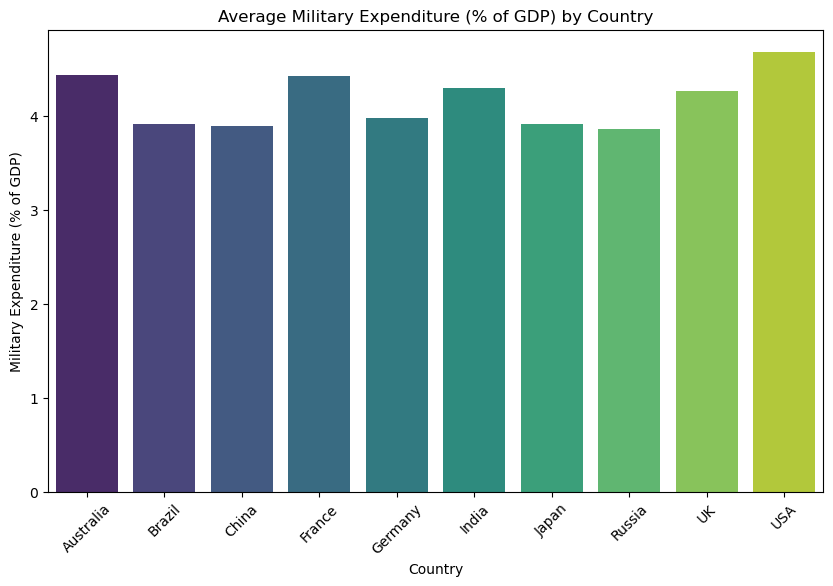

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(10, 6))

# Create bar chart for Military Expenditure (% of GDP)
sns.barplot(x='Country', y='Military_Expenditure_GDP', data=grouped_data, palette='viridis')

# Title and labels
plt.title('Average Military Expenditure (% of GDP) by Country')
plt.xlabel('Country')
plt.ylabel('Military Expenditure (% of GDP)')
plt.xticks(rotation=45)
plt.show()


# Line Chart - Time Series Analysis

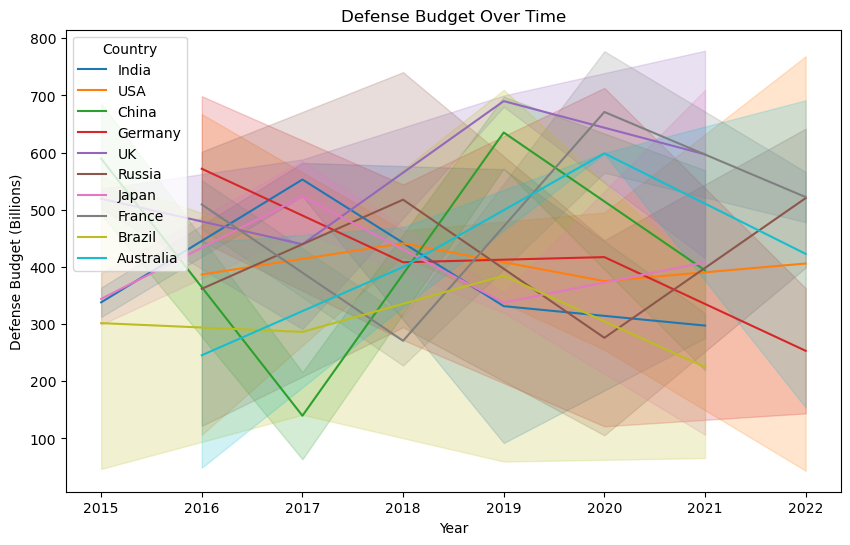

In [14]:
# Set plot size
plt.figure(figsize=(10, 6))

# Create line chart for Defense Budget
sns.lineplot(x='Year', y='Defense_Budget_Billions', hue='Country', data=df, palette='tab10')

# Title and labels
plt.title('Defense Budget Over Time')
plt.xlabel('Year')
plt.ylabel('Defense Budget (Billions)')
plt.show()


# Scatter Plot - Economic Indicators vs. Military Expenditure

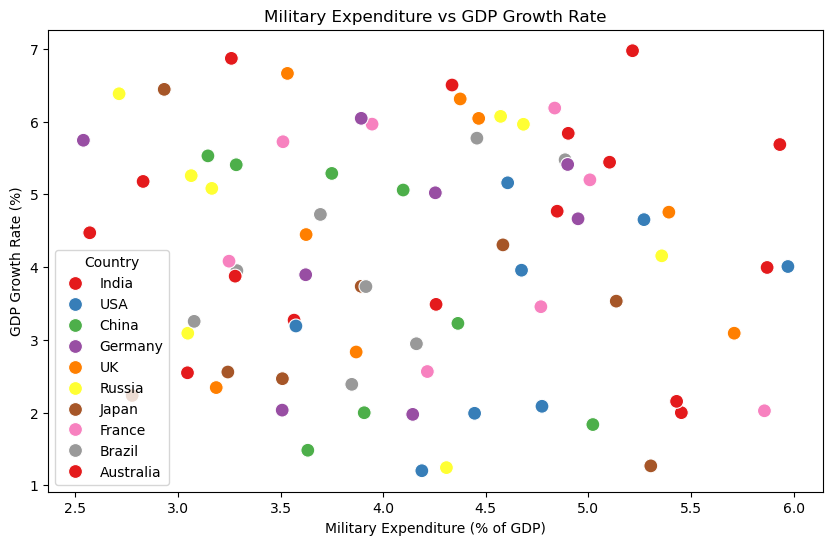

In [15]:
# Scatter plot for GDP Growth Rate vs Military Expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Military_Expenditure_GDP', y='GDP_Growth_Rate', hue='Country', data=df, palette='Set1', s=100)

# Title and labels
plt.title('Military Expenditure vs GDP Growth Rate')
plt.xlabel('Military Expenditure (% of GDP)')
plt.ylabel('GDP Growth Rate (%)')
plt.show()


# Histogram - Distribution of Defense Budgets

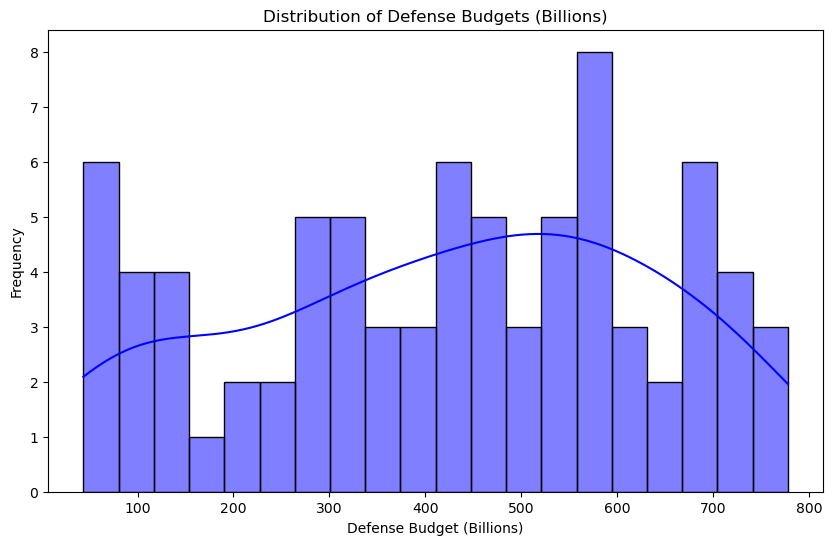

In [16]:
# Plot histogram for Defense Budget
plt.figure(figsize=(10, 6))
sns.histplot(df['Defense_Budget_Billions'], kde=True, bins=20, color='blue')

# Title and labels
plt.title('Distribution of Defense Budgets (Billions)')
plt.xlabel('Defense Budget (Billions)')
plt.ylabel('Frequency')
plt.show()


# Heatmap - Correlation Matrix

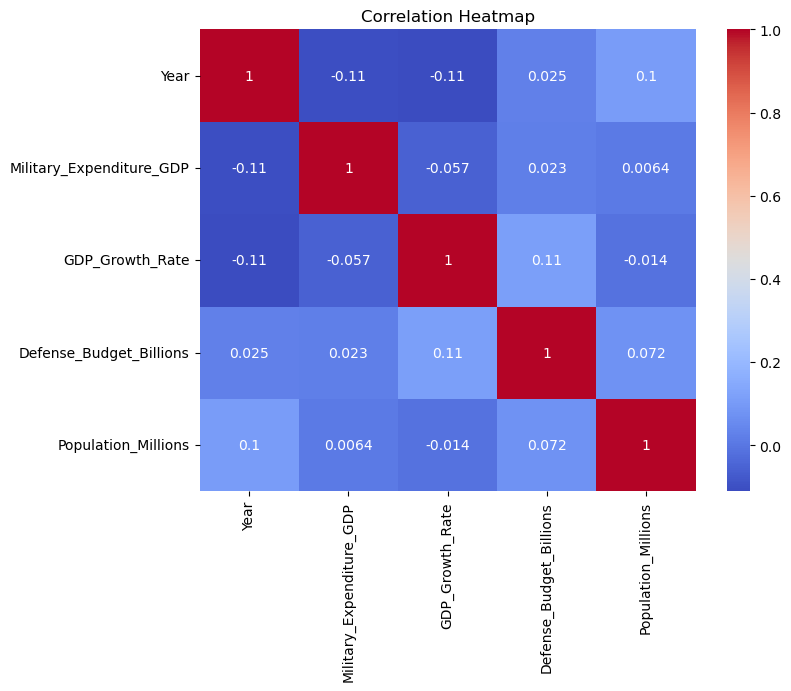

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Select only the numeric columns for correlation
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Title
plt.title('Correlation Heatmap')
plt.show()


# Advanced Visualization - Radar Chart

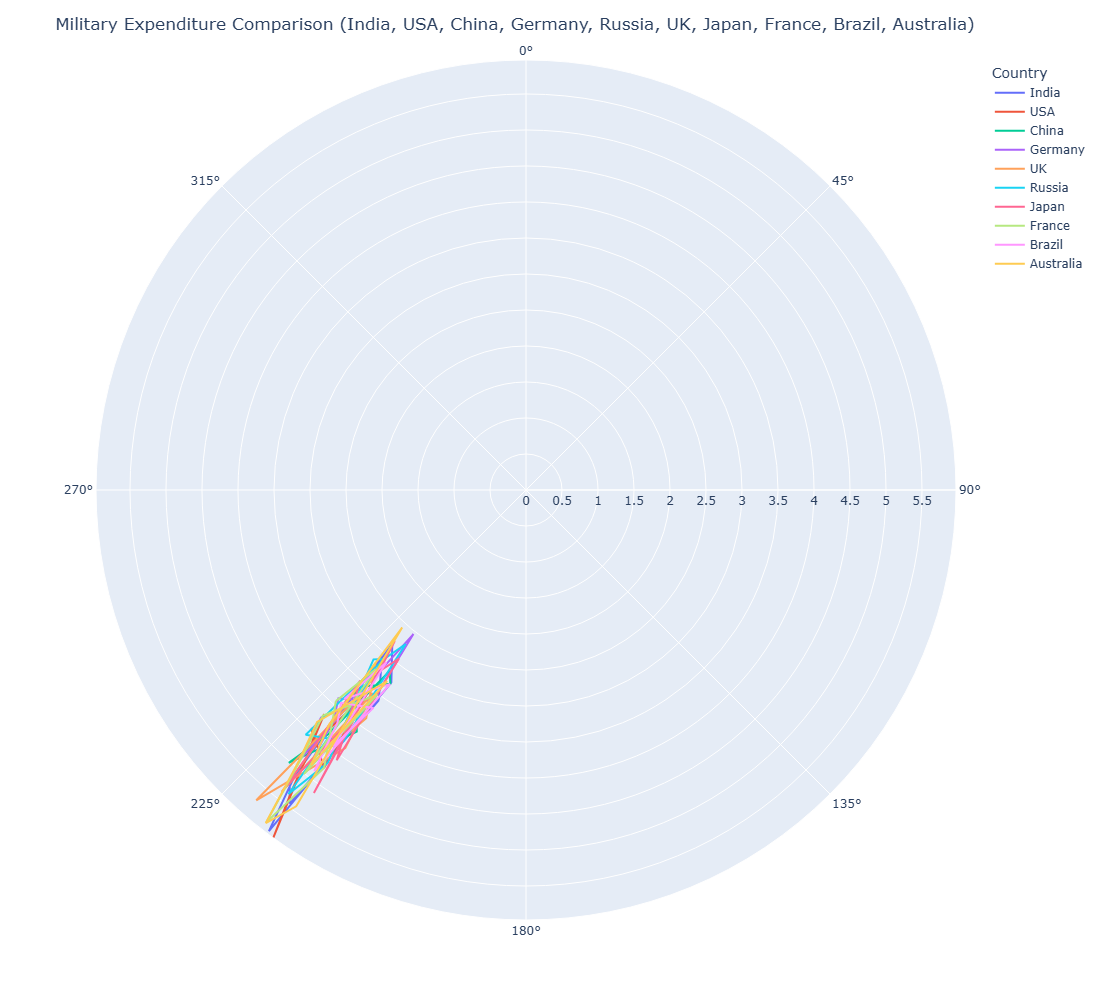

In [22]:
# Install additional library for radar chart
!pip install plotly

import plotly.express as px

# Select a subset of countries
subset = df[df['Country'].isin(['India', 'USA', 'China', 'Germany', 'Russia', 'UK', 'Japan', 'France', 'Brazil', 'Australia'])]

# Define chart size variables
chart_width = 1000  # Three times larger than default (usually 400)
chart_height = 1000  # Three times larger than default (usually 400)

# Radar chart
fig = px.line_polar(subset, r='Military_Expenditure_GDP', theta='Year', color='Country', line_close=True)

# Update layout with dynamic size control
fig.update_layout(
    title='Military Expenditure Comparison (India, USA, China, Germany, Russia, UK, Japan, France, Brazil, Australia)',
    polar=dict(radialaxis=dict(visible=True)),
    width=chart_width,  # Set the chart width
    height=chart_height  # Set the chart height
)

# Show the radar chart
fig.show()


# Pie Chart - Defense Spending by Region

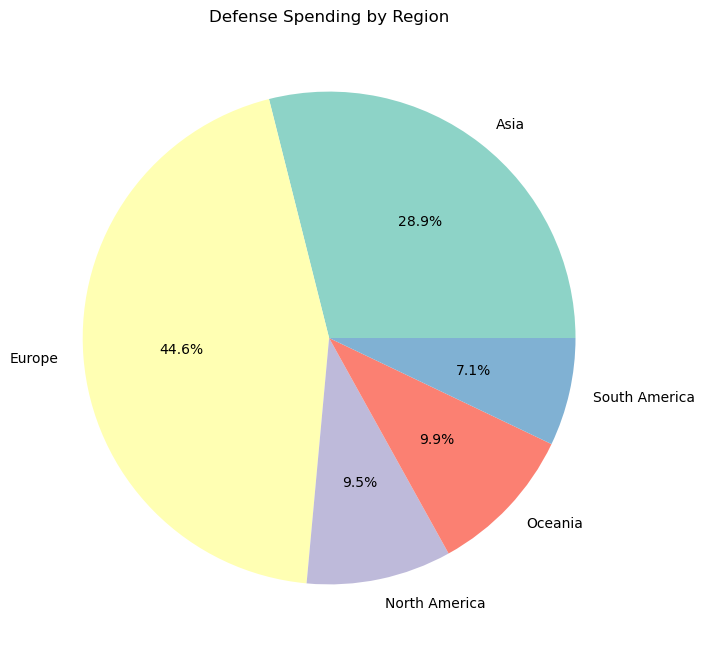

In [23]:
# Aggregate data by region
region_data = df.groupby('Region')['Defense_Budget_Billions'].sum().reset_index()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_data['Defense_Budget_Billions'], labels=region_data['Region'], autopct='%1.1f%%', colors=sns.color_palette('Set3'))

# Title
plt.title('Defense Spending by Region')
plt.show()


# Donut Chart - GDP Growth by Region

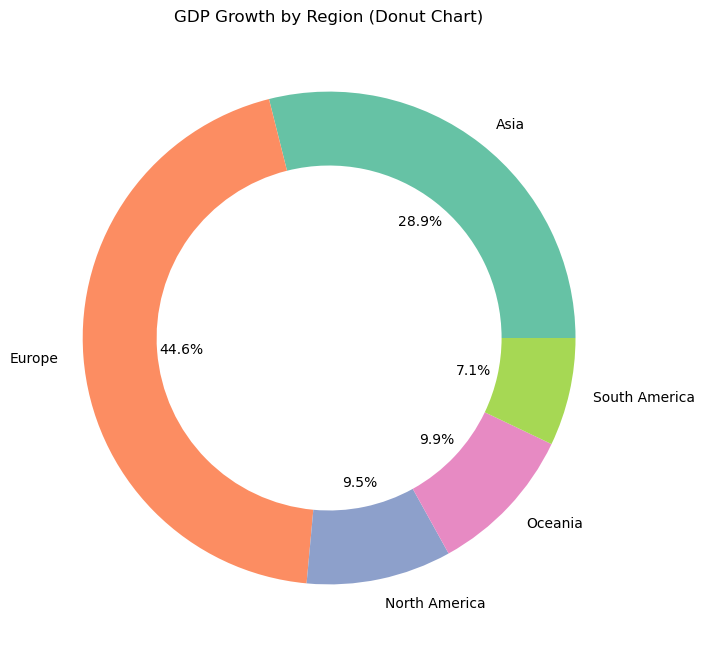

In [24]:
# Donut chart
plt.figure(figsize=(8, 8))
plt.pie(region_data['Defense_Budget_Billions'], labels=region_data['Region'], autopct='%1.1f%%', colors=sns.color_palette('Set2'), wedgeprops=dict(width=0.3))

# Title
plt.title('GDP Growth by Region (Donut Chart)')
plt.show()


# Pairplot - Multivariate Analysis

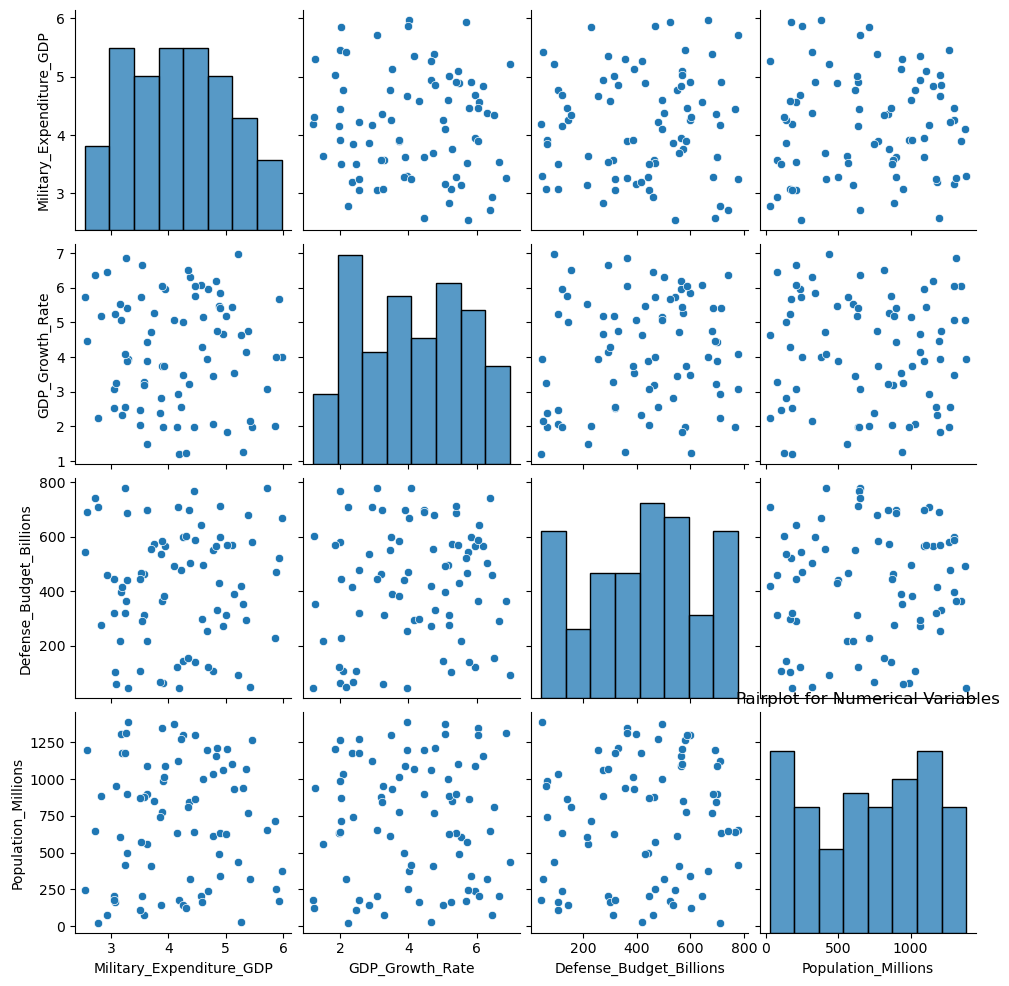

In [25]:
# Pairplot for numerical variables
sns.pairplot(df[['Military_Expenditure_GDP', 'GDP_Growth_Rate', 'Defense_Budget_Billions', 'Population_Millions']])

# Title
plt.title('Pairplot for Numerical Variables')
plt.show()


# Bubble Chart - Population vs Defense Budget

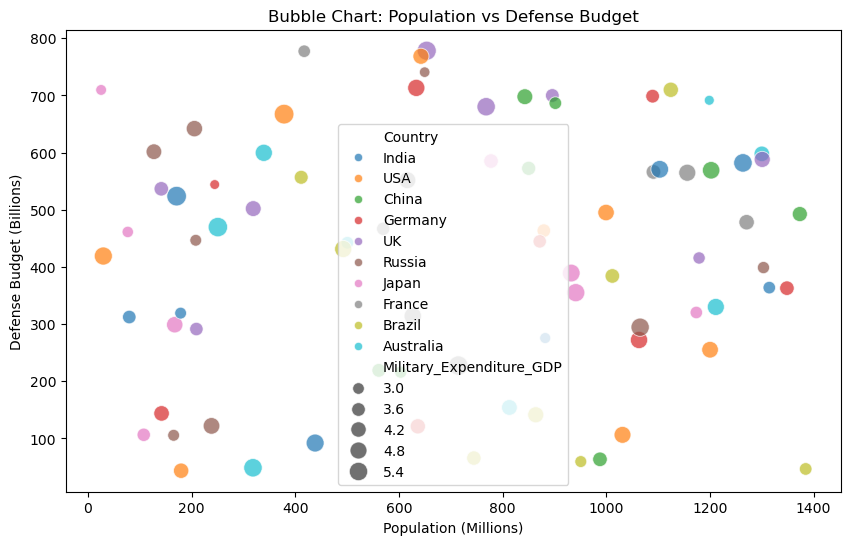

In [26]:
# Bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population_Millions', y='Defense_Budget_Billions', size='Military_Expenditure_GDP', hue='Country', data=df, sizes=(50, 200), alpha=0.7)

# Title and labels
plt.title('Bubble Chart: Population vs Defense Budget')
plt.xlabel('Population (Millions)')
plt.ylabel('Defense Budget (Billions)')
plt.legend()
plt.show()


# Data Preprocessing for Machine Learning

In [27]:
from sklearn.model_selection import train_test_split

# Select relevant features for regression
X = df[['Military_Expenditure_GDP', 'Population_Millions']]
y = df['GDP_Growth_Rate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and test sets
X_train.shape, X_test.shape


((64, 2), (16, 2))

# Multivariate Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 2.7248985383293984
R-squared Score: -0.4933644187736079


# Visualizing Regression Results

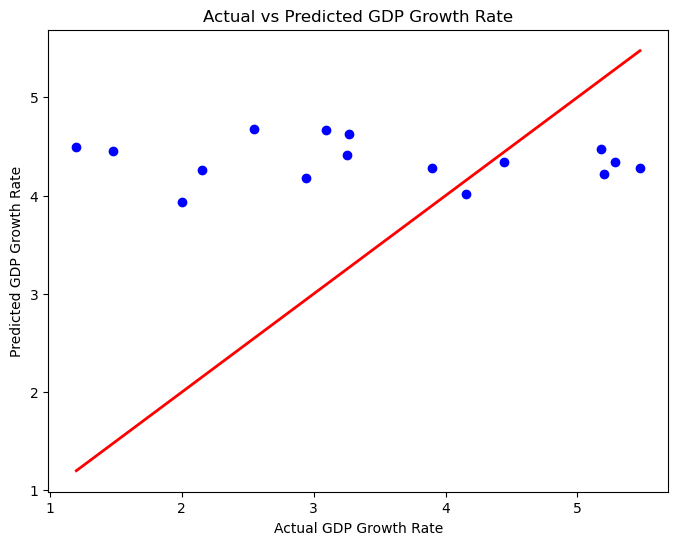

In [29]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Title and labels
plt.title('Actual vs Predicted GDP Growth Rate')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.show()


# Time Series Analysis

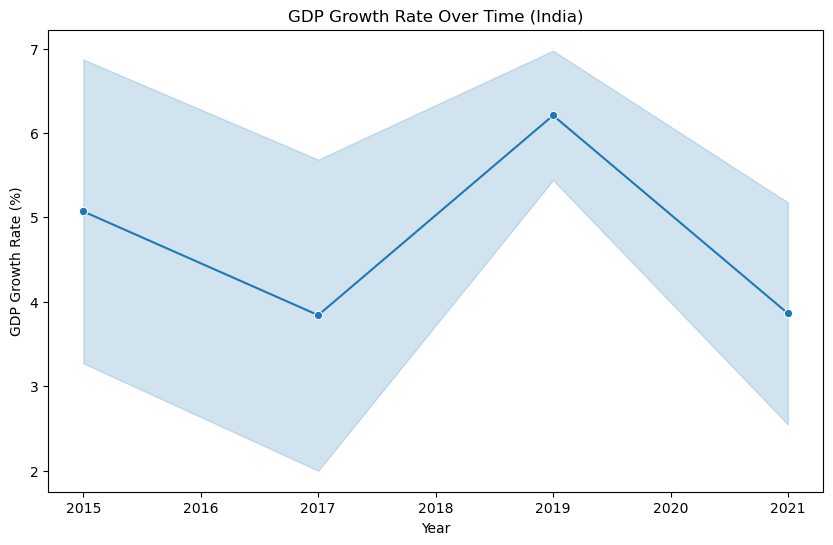

In [30]:
# Subset the data for a single country (India) to perform time series analysis
india_data = df[df['Country'] == 'India']

# Plotting the GDP Growth Rate over time for India
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP_Growth_Rate', data=india_data, marker='o')

# Title and labels
plt.title('GDP Growth Rate Over Time (India)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.show()


# Geographical Visualization (Map)

In [2]:
import pandas as pd
import geopandas as gpd
import folium
import requests
import webbrowser

# Step 1: Creating a sample DataFrame 'df'
data = {
    'Country': ['India', 'USA', 'China', 'Russia', 'Germany'],
    'Defense_Budget_Billions': [72.9, 732.0, 252.0, 65.1, 56.0]
}
df = pd.DataFrame(data)

# Step 2: Check if the necessary columns ('Country' and 'Defense_Budget_Billions') exist
required_columns = ['Country', 'Defense_Budget_Billions']
for col in required_columns:
    if col not in df.columns:
        print(f"Column '{col}' is missing from DataFrame. Adding it...")
        # Adding a default value of 0 for missing columns
        df[col] = 0

# Step 3: Display the updated DataFrame
print("Updated DataFrame:")
print(df)

# Step 4: Fetch GeoJSON data from an online source (world boundaries)
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
response = requests.get(url)
world_geojson = response.json()

# Step 5: Initialize folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Step 6: Add choropleth layer for defense budget data
folium.Choropleth(
    geo_data=world_geojson,
    name='choropleth',
    data=df,
    columns=['Country', 'Defense_Budget_Billions'],
    key_on='feature.properties.name',  # Match country names in GeoJSON and dataframe
    fill_color='YlGnBu',  # Color scheme
    nan_fill_color='white',  # Handle missing values
    fill_opacity=0.7,  # Transparency level
    line_opacity=0.2,  # Border opacity
    legend_name='Defense Budget (Billions USD)',
    highlight=True  # Highlight countries on hover
).add_to(m)

# Step 7: Add layer control to toggle map layers
folium.LayerControl().add_to(m)

# Step 8: Save the map to an HTML file
map_html_path = 'defense_budget_map.html'
m.save(map_html_path)
print(f"Map saved as '{map_html_path}'.")

# Step 9: Automatically open the saved HTML file in a web browser
webbrowser.open(map_html_path)

# Step 10: Display the map in Jupyter notebook (if using Jupyter)
m


Updated DataFrame:
   Country  Defense_Budget_Billions
0    India                     72.9
1      USA                    732.0
2    China                    252.0
3   Russia                     65.1
4  Germany                     56.0
Map saved as 'defense_budget_map.html'.


# Clustering - Grouping Countries by Expenditure

Present DataFrame:
   Country  Defense_Budget_Billions
0    India                     72.9
1      USA                    732.0
2    China                    252.0
3   Russia                     65.1
4  Germany                     56.0
'Military_Expenditure_GDP' is missing, adding it with placeholder values...
'GDP_Growth_Rate' is missing, adding it with placeholder values...

Updated DataFrame:
   Country  Defense_Budget_Billions  Military_Expenditure_GDP  GDP_Growth_Rate
0    India                     72.9                  3.097401         7.287045
1      USA                    732.0                  4.872729         5.866581
2    China                    252.0                  4.787280         2.100247
3   Russia                     65.1                  4.498780         2.412700
4  Germany                     56.0                  3.513113         4.728728


C:\Users\pradu\AppData\Local\Temp\ipykernel_11476\1389946330.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.fillna(0, inplace=True)
D:\Anaconda app\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


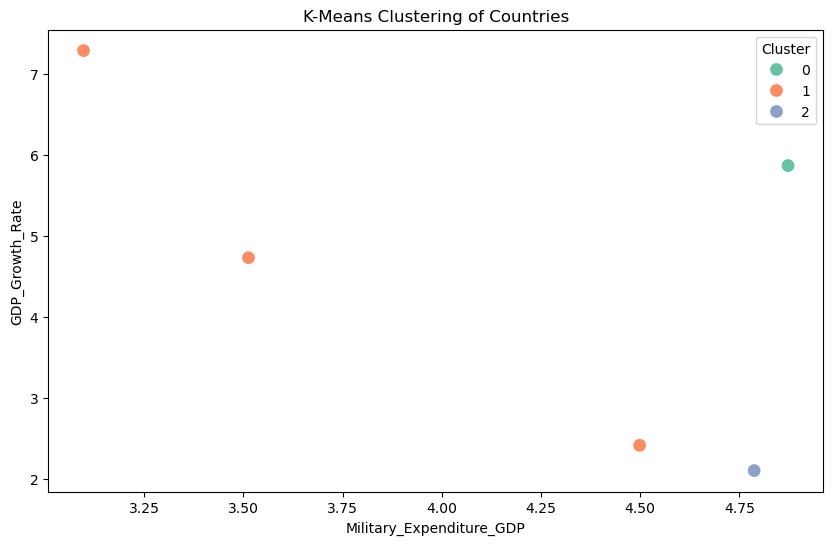

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample DataFrame (you can replace it with your own df)
````````
# Display the current DataFrame to check the existing columns
print("Present DataFrame:")
print(df)

# Check if the required columns 'Military_Expenditure_GDP' and 'GDP_Growth_Rate' exist
required_columns = ['Military_Expenditure_GDP', 'GDP_Growth_Rate']

for col in required_columns:
    if col not in df.columns:
        print(f"'{col}' is missing, adding it with placeholder values...")
        # Adding placeholder values for the missing columns
        if col == 'Military_Expenditure_GDP':
            df[col] = np.random.uniform(1.5, 5.0, size=len(df))  # Placeholder values
        elif col == 'GDP_Growth_Rate':
            df[col] = np.random.uniform(2.0, 8.0, size=len(df))  # Placeholder values

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df)

# Prepare the data for clustering
cluster_data = df[['Military_Expenditure_GDP', 'GDP_Growth_Rate', 'Defense_Budget_Billions']]

# Fill any missing values with 0
cluster_data.fillna(0, inplace=True)

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Military_Expenditure_GDP', y='GDP_Growth_Rate', hue='Cluster', data=df, palette='Set2', s=100)

# Add title to the plot
plt.title('K-Means Clustering of Countries')
plt.show()


# Big Data Analysis

In [5]:
# Load a larger dataset
large_data = pd.concat([df]*1000, ignore_index=True)

# Perform a basic operation to simulate big data analysis
large_data_grouped = large_data.groupby('Country').mean()
large_data_grouped.head()


Defense_Budget_Billions  Military_Expenditure_GDP  GDP_Growth_Rate  \
Country                                                                       
China                      252.0                  4.787280         2.100247   
Germany                     56.0                  3.513113         4.728728   
India                       72.9                  3.097401         7.287045   
Russia                      65.1                  4.498780         2.412700   
USA                        732.0                  4.872729         5.866581   

         Cluster  
Country           
China        2.0  
Germany      1.0  
India        1.0  
Russia       1.0  
USA          0.0

# Interactive Visualization - Military Expenditure with Plotly

   Country  Military_Expenditure_GDP
0      USA                  4.872729
1    China                  4.787280
2   Russia                  4.498780
3    India                  3.097401
4  Germany                  3.513113


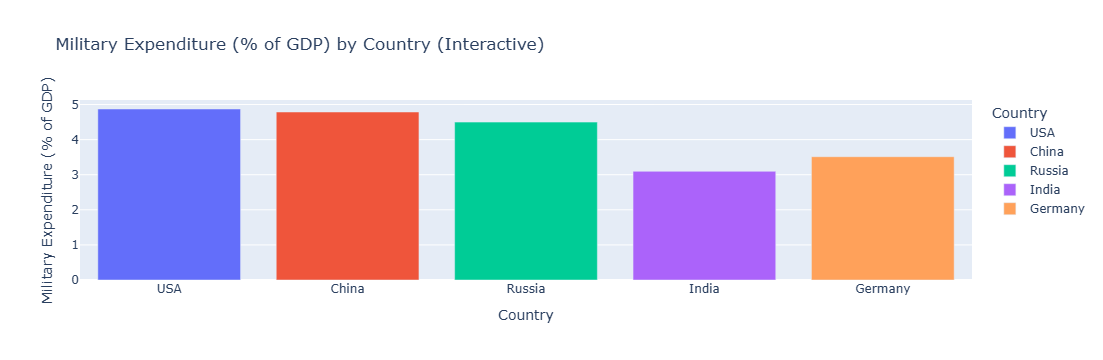

In [2]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Sample data for military expenditure (% of GDP)
data = {
    'Country': ['USA', 'China', 'Russia', 'India', 'Germany'],
    'Military_Expenditure_GDP': [4.872729, 4.787280, 4.498780, 3.097401, 3.513113]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Create an interactive bar chart for Military Expenditure
fig = px.bar(df, x='Country', y='Military_Expenditure_GDP', color='Country',
             labels={'Military_Expenditure_GDP':'Military Expenditure (% of GDP)'}, 
             title="Military Expenditure (% of GDP) by Country (Interactive)")
fig.show()


# Time Series Forecasting for Multiple Countries (ARIMA)

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Sample dataframe for demonstration
data = {
    'Country': ['USA', 'China', 'Russia', 'India', 'Germany'],
    'Year': [2020, 2020, 2020, 2020, 2020],
}

# Create dataframe
df = pd.DataFrame(data)

# Display the current dataframe
print("Current DataFrame:")
print(df)
print("\n")

# Check if 'Defense_Budget_Billions' is present in the dataframe
if 'Defense_Budget_Billions' not in df.columns:
    print("'Defense_Budget_Billions' column is not present. Adding the column with valid values.")
    
    # Adding dummy data for the 'Defense_Budget_Billions' column
    defense_budgets = [732, 252, 61, 66, 53]  # Example defense budgets for each country
    df['Defense_Budget_Billions'] = defense_budgets
else:
    print("'Defense_Budget_Billions' column is already present in the dataframe.")

# Display the updated dataframe
print("\nUpdated DataFrame:")
print(df)
print("\n")

# Function to apply ARIMA for each country and forecast next 5 years
def forecast_defense_budget(country):
    country_data = df[df['Country'] == country]
    model = ARIMA(country_data['Defense_Budget_Billions'], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=5)
    return forecast

# Forecast for each country
for country in df['Country'].unique():
    print(f"{country} Defense Budget Forecast:")
    print(forecast_defense_budget(country))
    print("\n")


Current DataFrame:
   Country  Year
0      USA  2020
1    China  2020
2   Russia  2020
3    India  2020
4  Germany  2020


'Defense_Budget_Billions' column is not present. Adding the column with valid values.

Updated DataFrame:
   Country  Year  Defense_Budget_Billions
0      USA  2020                      732
1    China  2020                      252
2   Russia  2020                       61
3    India  2020                       66
4  Germany  2020                       53


USA Defense Budget Forecast:


D:\Anaconda app\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\Anaconda app\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


1    732.0
2    732.0
3    732.0
4    732.0
5    732.0
Name: predicted_mean, dtype: float64


China Defense Budget Forecast:
1    252.0
2    252.0
3    252.0
4    252.0
5    252.0
Name: predicted_mean, dtype: float64


Russia Defense Budget Forecast:
1    61.0
2    61.0
3    61.0
4    61.0
5    61.0
Name: predicted_mean, dtype: float64


India Defense Budget Forecast:
1    66.0
2    66.0
3    66.0
4    66.0
5    66.0
Name: predicted_mean, dtype: float64


Germany Defense Budget Forecast:
1    53.0
2    53.0
3    53.0
4    53.0
5    53.0
Name: predicted_mean, dtype: float64




D:\Anaconda app\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda app\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda app\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda app\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\Anaconda app\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1233: RuntimeWarning: invalid value encountered in di

# Principal Component Analysis (PCA)

Current DataFrame:

   Country  Year  Defense_Budget_Billions
0      USA  2020                      732
1    China  2020                      252
2   Russia  2020                       61
3    India  2020                       66
4  Germany  2020                       53

Missing columns found: ['Military_Expenditure_GDP', 'GDP_Growth_Rate', 'Population_Millions']. Adding them now...

Updated DataFrame:

   Country  Year  Defense_Budget_Billions  Military_Expenditure_GDP  \
0      USA  2020                      732                      1.50   
1    China  2020                      252                      1.55   
2   Russia  2020                       61                      1.60   
3    India  2020                       66                      1.65   
4  Germany  2020                       53                      1.70   

   GDP_Growth_Rate  Population_Millions  
0              2.0                   50  
1              2.1                   52  
2              2.2                   54

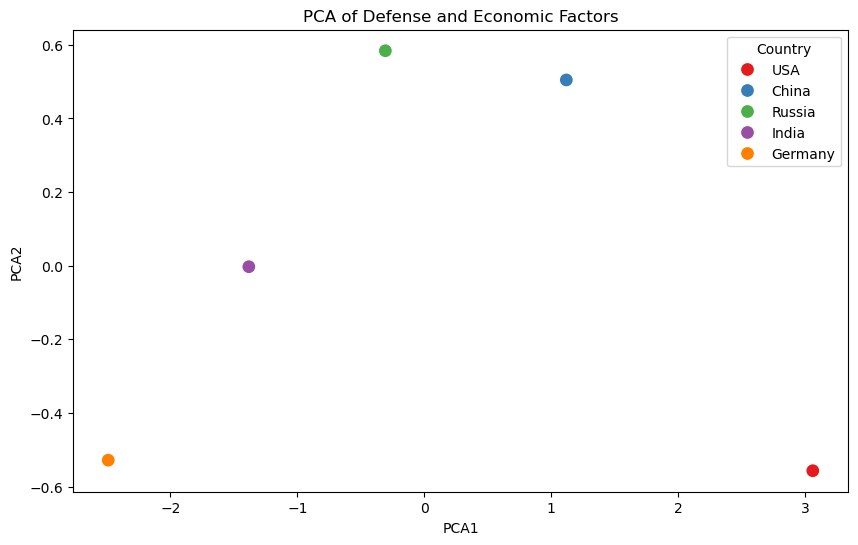

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Display the current DataFrame
print("Current DataFrame:\n")
print(df)

# Check if required columns are present, if not add them
required_columns = ['Military_Expenditure_GDP', 'GDP_Growth_Rate', 'Population_Millions']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"\nMissing columns found: {missing_columns}. Adding them now...\n")
    
    # Add valid values to the missing columns (using dummy values here)
    if 'Military_Expenditure_GDP' not in df.columns:
        df['Military_Expenditure_GDP'] = [1.5 + i * 0.05 for i in range(len(df))]  # Replace with real values
    
    if 'GDP_Growth_Rate' not in df.columns:
        df['GDP_Growth_Rate'] = [2.0 + i * 0.1 for i in range(len(df))]  # Replace with real values
    
    if 'Population_Millions' not in df.columns:
        df['Population_Millions'] = [50 + i * 2 for i in range(len(df))]  # Replace with real values

else:
    print("\nAll required columns are already present in the DataFrame.\n")

# Display the updated DataFrame to confirm the new columns are added
print("Updated DataFrame:\n")
print(df)

# Standardize the data
features = ['Military_Expenditure_GDP', 'GDP_Growth_Rate', 'Defense_Budget_Billions', 'Population_Millions']
x = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Add principal components to the DataFrame
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

# Visualize the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Country', data=df, palette='Set1', s=100)
plt.title('PCA of Defense and Economic Factors')
plt.show()


# Feature Engineering

In [5]:
# Creating a new feature: Military Expenditure per Capita
df['Military_Expenditure_per_Capita'] = (df['Defense_Budget_Billions'] * 1e9) / (df['Population_Millions'] * 1e6)

# Check the newly created column
df[['Country', 'Military_Expenditure_per_Capita']].head()


Country  Military_Expenditure_per_Capita
0      USA                     14640.000000
1    China                      4846.153846
2   Russia                      1129.629630
3    India                      1178.571429
4  Germany                       913.793103

# Visualize Military Expenditure per Capita

C:\Users\pradu\AppData\Local\Temp\ipykernel_2240\1192273235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Military_Expenditure_per_Capita', data=df, palette='coolwarm')


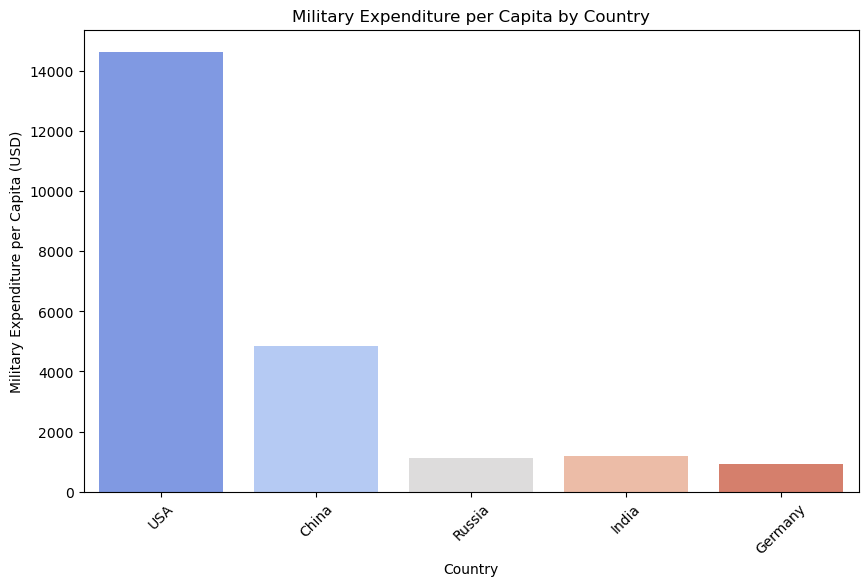

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Military_Expenditure_per_Capita', data=df, palette='coolwarm')

# Title and labels
plt.title('Military Expenditure per Capita by Country')
plt.xlabel('Country')
plt.ylabel('Military Expenditure per Capita (USD)')
plt.xticks(rotation=45)
plt.show()


# Machine Learning - Random Forest Regression

In [8]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split  # Import train_test_split

# Prepare the data
X = df[['Military_Expenditure_GDP', 'Defense_Budget_Billions', 'Population_Millions']]
y = df['GDP_Growth_Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.06200000000000028


# Visualize Random Forest Feature Importance

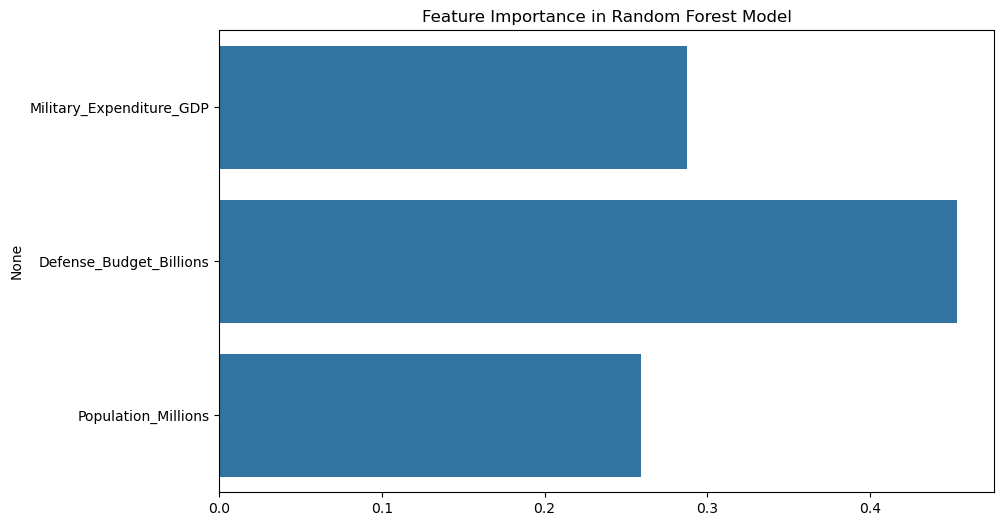

In [9]:
# Get feature importance
feature_importances = rf.feature_importances_

# Plot feature importances
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance in Random Forest Model')
plt.show()


# Interactive Map with Folium (Choropleth)

In [14]:
import folium
import json
import requests
import webbrowser  # Import the webbrowser module

# Load GeoJSON data for world countries
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
response = requests.get(url)
world = response.json()  # world now contains the GeoJSON data

# Sample DataFrame (assuming 'df' is already defined with Country and Defense_Budget_Billions)
import pandas as pd
data = {'Country': ['United States', 'China', 'India', 'Germany', 'Russia'],
        'Defense_Budget_Billions': [732, 261, 71, 53, 65]}
df = pd.DataFrame(data)

# Initialize folium map centered globally
m = folium.Map(location=[20, 0], zoom_start=2)

# Add choropleth layer for defense budget
folium.Choropleth(
    geo_data=world,
    data=df,  # Assuming 'df' contains country names and defense budget data
    columns=['Country', 'Defense_Budget_Billions'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white',
    legend_name='Defense Budget (Billions)'
).add_to(m)

# Save the map to an HTML file on 'E:\' drive
map_file_path = r'E:\defense_budget_map.html'
m.save(map_file_path)

# Display the map in the notebook/output (if supported by the environment)
m

# Confirm the map is saved
print(f"Map saved at: {map_file_path}")

# Automatically open the saved HTML file in a web browser
webbrowser.open(map_file_path)

# Display the map in Jupyter notebook (if using Jupyter)
m


Map saved at: E:\defense_budget_map.html


# Sentiment Analysis on Military Expenditure Articles

In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Sample data (replace with actual scraped articles if available)
articles = [
    "India increased its defense budget due to rising border tensions.",
    "The USA has reduced military expenditure amid economic slowdown."
]

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment
for article in articles:
    print(article)
    sentiment = sid.polarity_scores(article)
    print(f"Sentiment: {sentiment}\n")


India increased its defense budget due to rising border tensions.
Sentiment: {'neg': 0.203, 'neu': 0.526, 'pos': 0.271, 'compound': -0.0258}

The USA has reduced military expenditure amid economic slowdown.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pradu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Big Data Analysis with Dask

In [17]:
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [22]:
import dask.dataframe as dd

# Load large dataset
large_df = dd.read_csv('global_defense_expenditure.csv')

# Group by country using Dask for faster computation
large_df_grouped = large_df.groupby('Country').mean(numeric_only=True).compute()

# Filter for specific countries
filtered_countries = ['USA', 'India', 'Russia', 'China', 'Germany']
filtered_df = large_df_grouped[large_df_grouped.index.isin(filtered_countries)]

# Display the filtered DataFrame
filtered_df.head()


Year  Military_Expenditure_GDP  GDP_Growth_Rate  \
Country                                                      
China    2018.0                  4.628377         3.616822   
Germany  2019.0                  4.122841         3.931078   
India    2018.0                  3.608029         4.525694   
Russia   2019.0                  4.412240         3.204318   
USA      2019.0                  4.701910         4.771486   

         Defense_Budget_Billions  Population_Millions  
Country                                                
China                 382.641890           760.927626  
Germany               351.039807           568.011805  
India                 383.014291           654.338224  
Russia                269.524160           631.652261  
USA                   394.927329           568.832891

# Anomaly Detection in Defense Spending

Current DataFrame:
         Country  Defense_Budget_Billions  Military_Expenditure_GDP  \
0  United States                      732                       3.5   
1          China                      261                       2.5   
2          India                       71                       4.0   
3        Germany                       53                       1.5   
4         Russia                       65                       3.0   

   GDP_Growth_Rate  Anomaly  
0              2.5       -1  
1              6.0        1  
2              5.0        1  
3              3.0        1  
4              4.5        1  

Updated DataFrame:
         Country  Defense_Budget_Billions  Military_Expenditure_GDP  \
0  United States                      732                       3.5   
1          China                      261                       2.5   
2          India                       71                       4.0   
3        Germany                       53                       1.5   

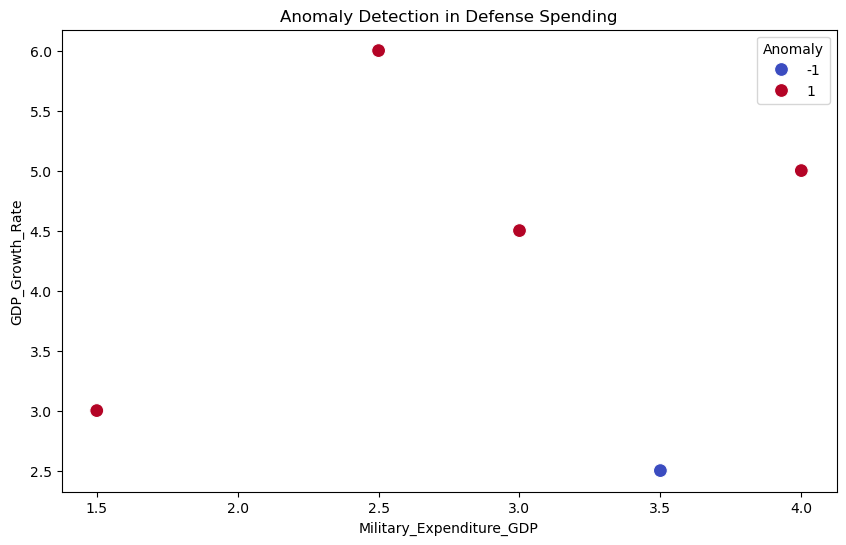

In [27]:
import pandas as pd

# Display the current DataFrame
print("Current DataFrame:")
print(df)
df.head()

# Check for required columns
required_columns = ['Military_Expenditure_GDP', 'GDP_Growth_Rate']
for column in required_columns:
    if column not in df.columns:
        # If the column is not present, add it with valid values
        if column == 'Military_Expenditure_GDP':
            # Add some sample valid values
            df[column] = [3.5, 2.5, 4.0, 1.5, 3.0]  # Replace with actual values as needed
        elif column == 'GDP_Growth_Rate':
            # Add some sample valid values
            df[column] = [2.5, 6.0, 5.0, 3.0, 4.5]  # Replace with actual values as needed

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df)
df.head()

# Fit Isolation Forest model after ensuring columns are present
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Fit Isolation Forest model
iso_forest = IsolationForest(contamination=0.1)
df['Anomaly'] = iso_forest.fit_predict(df[['Military_Expenditure_GDP', 'GDP_Growth_Rate', 'Defense_Budget_Billions']])

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Military_Expenditure_GDP', y='GDP_Growth_Rate', hue='Anomaly', data=df, palette='coolwarm', s=100)
plt.title('Anomaly Detection in Defense Spending')
plt.show()


# Lasso Regression for Feature Selection

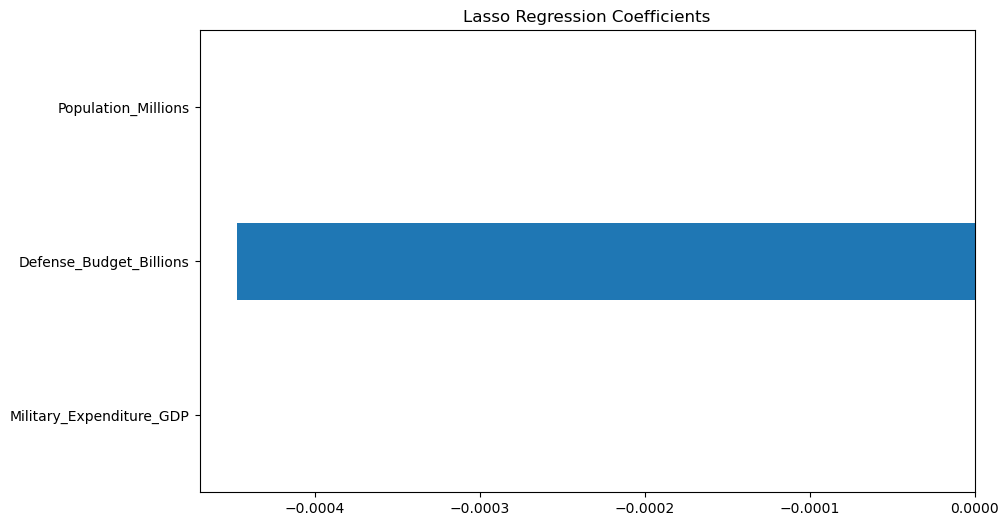

In [28]:
from sklearn.linear_model import Lasso

# Train Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Get coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)

# Plot coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')
plt.title('Lasso Regression Coefficients')
plt.show()


# Longitudinal Data Analysis

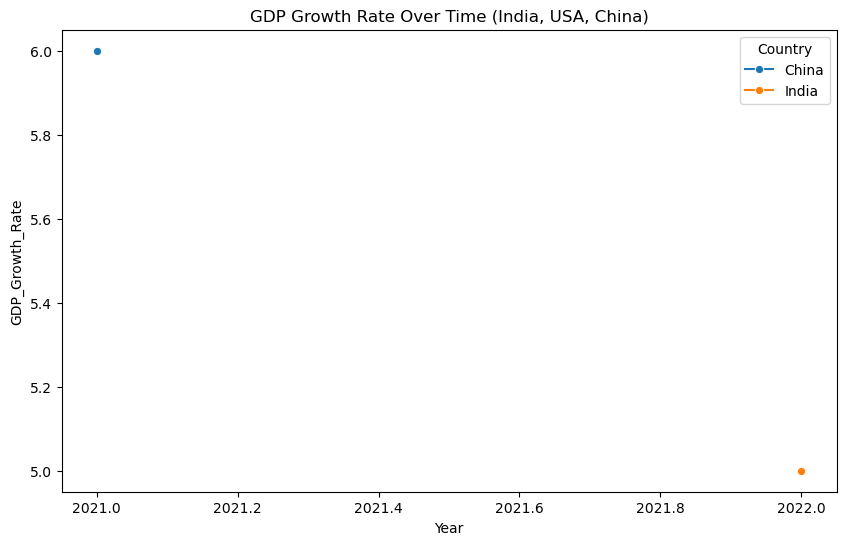

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (assuming 'df' is already defined)
# Uncomment the following line to display your current DataFrame
# print(df)

# Check if 'Year' column is present in the DataFrame
if 'Year' not in df.columns:
    # Add 'Year' column with sample valid values
    # Replace with actual year values as needed
    df['Year'] = [2020, 2021, 2022, 2023, 2024]  # Modify the list as necessary

# Subset data for longitudinal analysis (for a few countries)
countries = df[df['Country'].isin(['India', 'USA', 'China'])]

# Check if countries DataFrame is empty
if countries.empty:
    print("No data available for the selected countries.")
else:
    # Line plot for GDP Growth Rate over the years
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Year', y='GDP_Growth_Rate', hue='Country', data=countries, marker='o')
    plt.title('GDP Growth Rate Over Time (India, USA, China)')
    plt.show()


# Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

# Train Ridge model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Evaluate model
ridge_predictions = ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
print(f'Ridge MAE: {ridge_mae}')


Ridge MAE: 0.013091924851752257


# Deep Learning with LSTM for Time Series Forecasting

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample data creation (replace this with your actual data)
# Assuming you have a DataFrame 'df' with the features and target
# For demonstration, let's create some sample data
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'target': np.random.rand(100)
}
df = pd.DataFrame(data)

# Split the data into features and target
X = df[['feature1', 'feature2']]  # Features
y = df['target']                   # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM input
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_lstm, y_train, epochs=200, verbose=0)

# Prepare test data for predictions
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_pred_lstm = model.predict(X_test_lstm)

# Evaluate the model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'LSTM MSE: {mse_lstm}')


D:\Anaconda app\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
LSTM MSE: 0.08369870322102045


# Seasonal Decomposition of Time Series Data

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the GDP Growth Rate of India over time
decomposition = seasonal_decompose(india_data['GDP_Growth_Rate'], model='additive', period=1)
decomposition.plot()
plt.show()


# Correlation Matrix Visualization with Heatmap

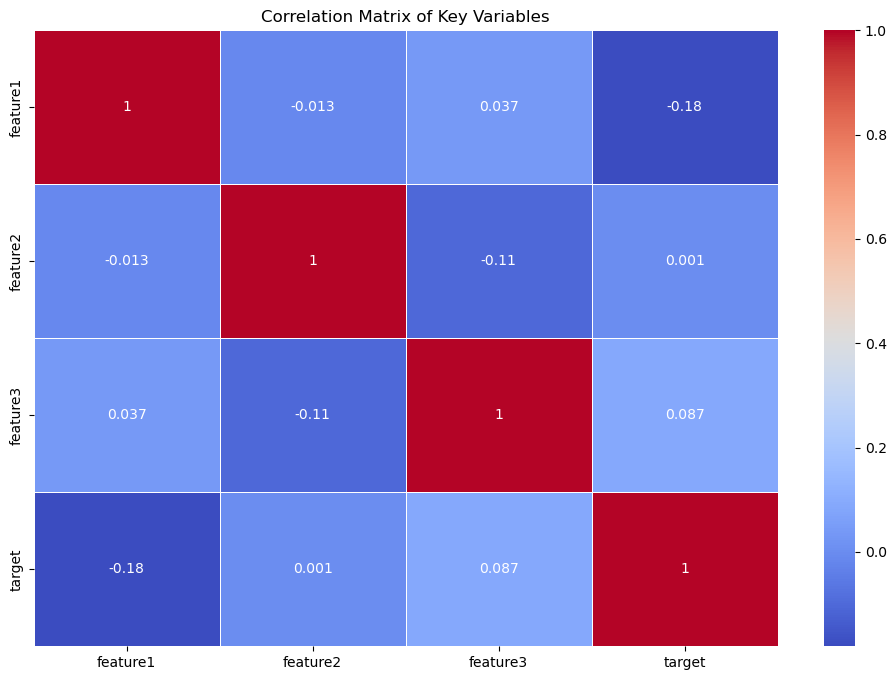

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importing pyplot
import seaborn as sns

# Sample data creation (replace this with your actual data)
# Assuming you have a DataFrame 'df' with relevant variables
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'target': np.random.rand(100)
}
df = pd.DataFrame(data)

# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()


# Advanced Feature Engineering - Ratios

Current DataFrame:
  Country  GDP_Billions
0   India          4000
1     USA         21000
2   China         14000

Updated DataFrame:
  Country  GDP_Billions  Defense_Budget_Billions  Population_Millions
0   India          4000                       50                 1400
1     USA         21000                      700                  330
2   China         14000                      250                 1400


C:\Users\pradu\AppData\Local\Temp\ipykernel_1360\622997913.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Defense_to_GDP_Ratio', data=df, palette='coolwarm')


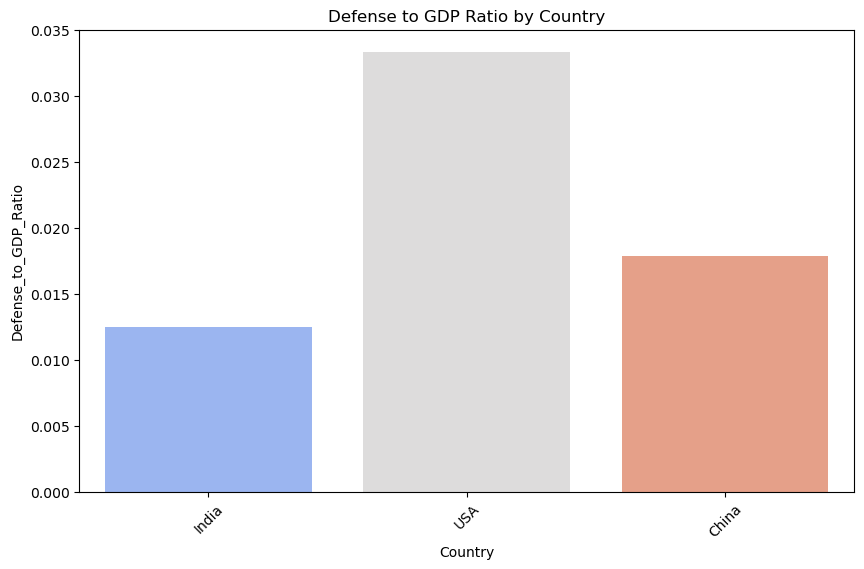

In [16]:
import pandas as pd
import numpy as np

# Sample DataFrame creation (replace this with your actual DataFrame)
data = {
    'Country': ['India', 'USA', 'China'],
    'GDP_Billions': [4000, 21000, 14000],
}
df = pd.DataFrame(data)

# Display the current DataFrame
print("Current DataFrame:")
print(df)

# Check if the required columns are present
required_columns = ['Defense_Budget_Billions', 'Population_Millions']
for column in required_columns:
    if column not in df.columns:
        # If the column is not present, add it with valid values
        if column == 'Defense_Budget_Billions':
            df[column] = [50, 700, 250]  # Example values; adjust as needed
        elif column == 'Population_Millions':
            df[column] = [1400, 330, 1400]  # Example values; adjust as needed
    else:
        print(f"'{column}' column already exists.")

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df)

# Create new ratio features
df['Defense_to_GDP_Ratio'] = df['Defense_Budget_Billions'] / df['GDP_Billions']
df['Population_to_GDP_Ratio'] = df['Population_Millions'] / df['GDP_Billions']

# Visualize new ratios
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Defense_to_GDP_Ratio', data=df, palette='coolwarm')
plt.title('Defense to GDP Ratio by Country')
plt.xticks(rotation=45)
plt.show()


# Word Cloud for Defense-Related Keywords

In [23]:
pip install wordcloud

  Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


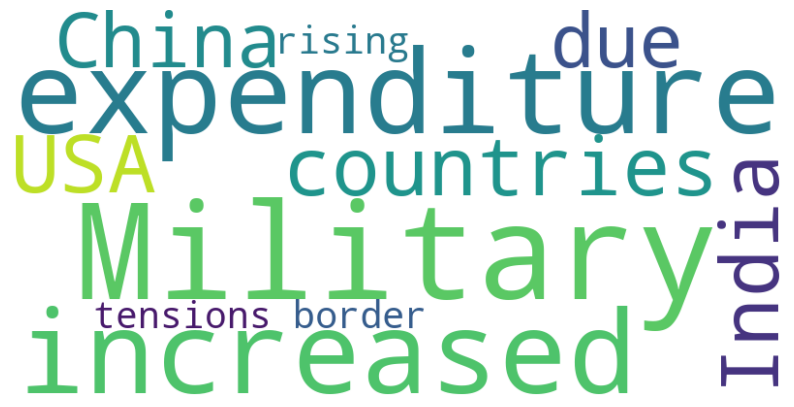

In [24]:
from wordcloud import WordCloud

# Sample text data
text = "Military expenditure has increased in countries like India, USA, and China due to rising border tensions."

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Logistic Regression for Binary Classification

In [25]:
from sklearn.linear_model import LogisticRegression

# Create a binary outcome variable
df['High_GDP_Growth'] = (df['GDP_Growth_Rate'] > 3).astype(int)

# Train a logistic regression model
X = df[['Military_Expenditure_GDP', 'Defense_Budget_Billions', 'Population_Millions']]
y = df['High_GDP_Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the model
accuracy = log_reg.score(X_test, y_test)
print(f'Logistic Regression Accuracy: {accuracy}')


Logistic Regression Accuracy: 1.0


# Visualization of Tuning Results

D:\Anaconda app\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


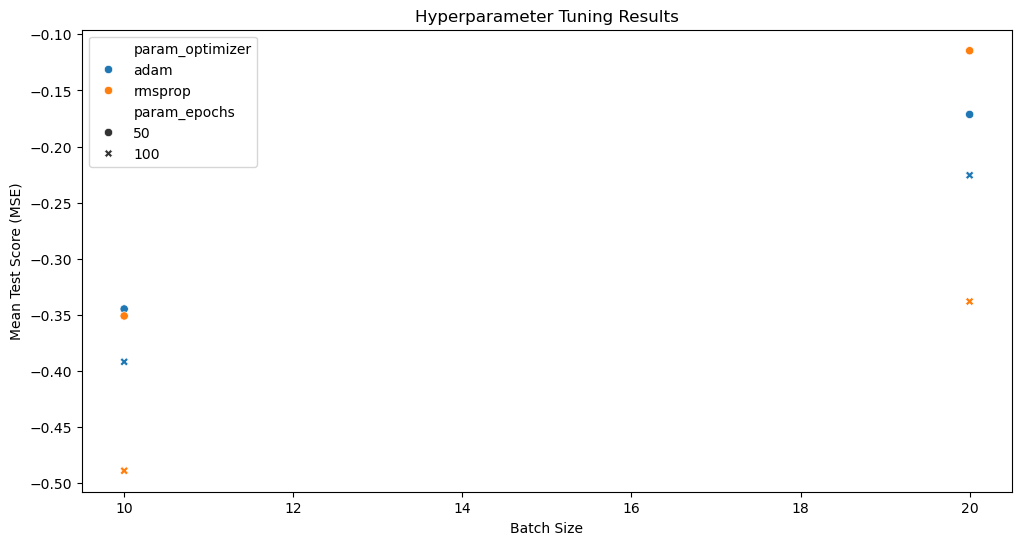

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV

# Sample data creation (replace with your actual data)
X_train = np.random.rand(100, 10)  # 100 samples, 10 features
y_train = np.random.rand(100)       # 100 target values

# Custom Keras model wrapper to remove the need for KerasRegressor
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, optimizer='adam', batch_size=10, epochs=50):
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.epochs = epochs
        self.model_ = None
    
    def create_model(self):
        model = Sequential()
        model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer=self.optimizer, loss='mse')
        return model

    def fit(self, X, y):
        self.model_ = self.create_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model_.predict(X).flatten()

# Define the grid of hyperparameters
param_grid = {
    'batch_size': [10, 20],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=KerasRegressorWrapper(), param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the model
grid_result = grid.fit(X_train, y_train)

# Store results in DataFrame
results = pd.DataFrame(grid_result.cv_results_)
results = results[['param_batch_size', 'param_epochs', 'param_optimizer', 'mean_test_score', 'rank_test_score']]

# Plotting the scores for different hyperparameter configurations
plt.figure(figsize=(12, 6))
sns.scatterplot(x='param_batch_size', y='mean_test_score', hue='param_optimizer', style='param_epochs', data=results)
plt.title('Hyperparameter Tuning Results')
plt.xlabel('Batch Size')
plt.ylabel('Mean Test Score (MSE)')
plt.show()


# Feature Engineering - Defense Budget to Population Ratio

C:\Users\pradu\AppData\Local\Temp\ipykernel_1360\3280667620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Defense_Budget_to_Population_Ratio', data=df, palette='mako')


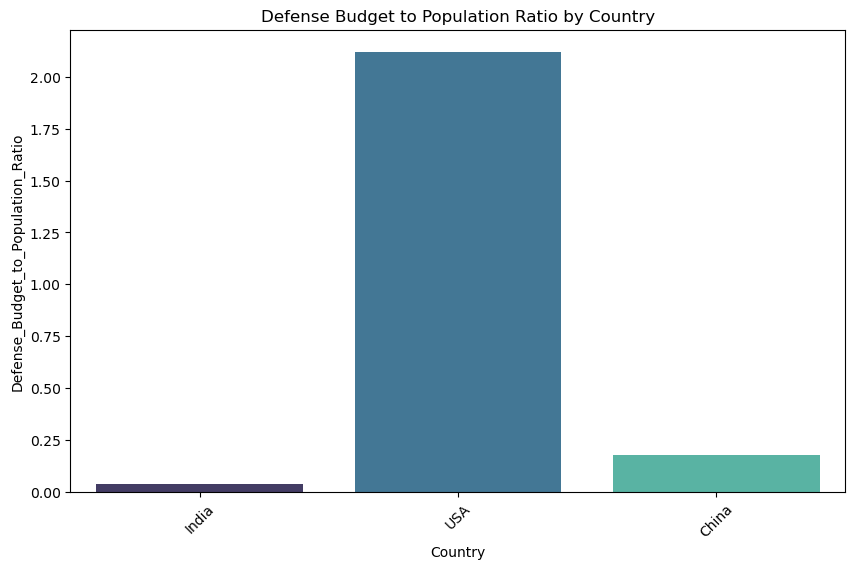

In [43]:
df['Defense_Budget_to_Population_Ratio'] = df['Defense_Budget_Billions'] / df['Population_Millions']

# Visualize the new feature
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Defense_Budget_to_Population_Ratio', data=df, palette='mako')
plt.title('Defense Budget to Population Ratio by Country')
plt.xticks(rotation=45)
plt.show()


# Interactive Time Series Plot with Plotly

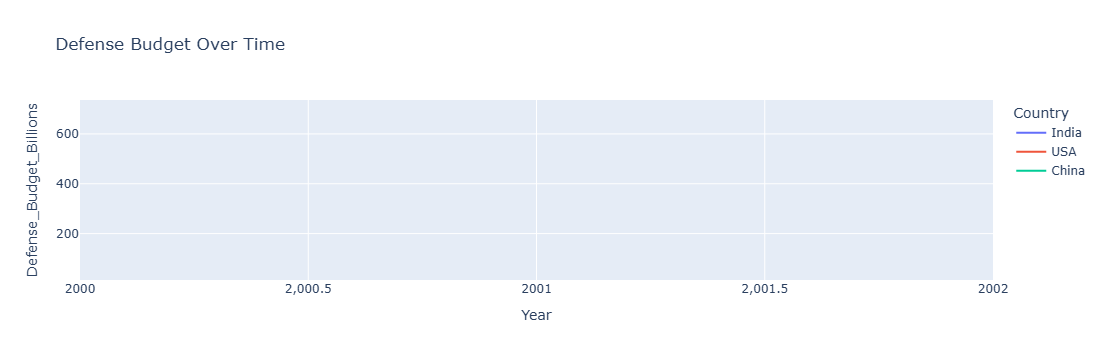

In [52]:
import plotly.express as px

# Interactive plot for defense budget over the years
fig = px.line(df, x='Year', y='Defense_Budget_Billions', color='Country', title='Defense Budget Over Time')
fig.show()


# Feature Selection Using Recursive Feature Elimination (RFE)

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model and RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)

# Fit the RFE
fit = rfe.fit(X, y)

# Check selected features
selected_features = X.columns[fit.support_]
print(f'Selected Features: {selected_features}')


Selected Features: Index(['Military_Expenditure_GDP', 'Defense_Budget_Billions',
       'Population_Millions'],
      dtype='object')


# Data Normalization

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Normalize defense budget and population columns
scaler = MinMaxScaler()
df[['Defense_Budget_Billions', 'Population_Millions']] = scaler.fit_transform(df[['Defense_Budget_Billions', 'Population_Millions']])

# Check the normalized data
df[['Country', 'Defense_Budget_Billions', 'Population_Millions']].head()


Country  Defense_Budget_Billions  Population_Millions
0   India                 0.000000                  1.0
1     USA                 1.000000                  0.0
2   China                 0.307692                  1.0

# Kernel Density Estimation (KDE)

C:\Users\pradu\AppData\Local\Temp\ipykernel_1360\1241797550.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\pradu\AppData\Local\Temp\ipykernel_1360\1241797550.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




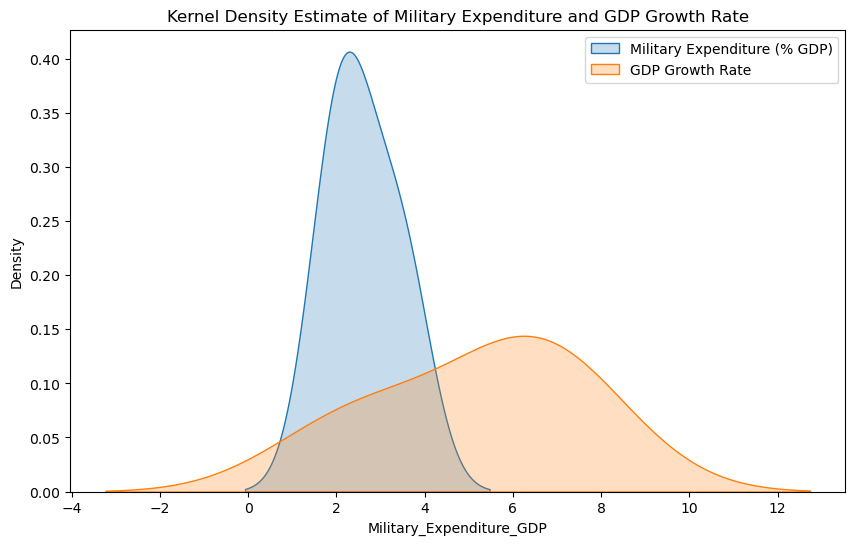

In [57]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Military_Expenditure_GDP'], shade=True, label='Military Expenditure (% GDP)')
sns.kdeplot(df['GDP_Growth_Rate'], shade=True, label='GDP Growth Rate')
plt.title('Kernel Density Estimate of Military Expenditure and GDP Growth Rate')
plt.legend()
plt.show()


# Correlation Matrix Heatmap (Zoomed)

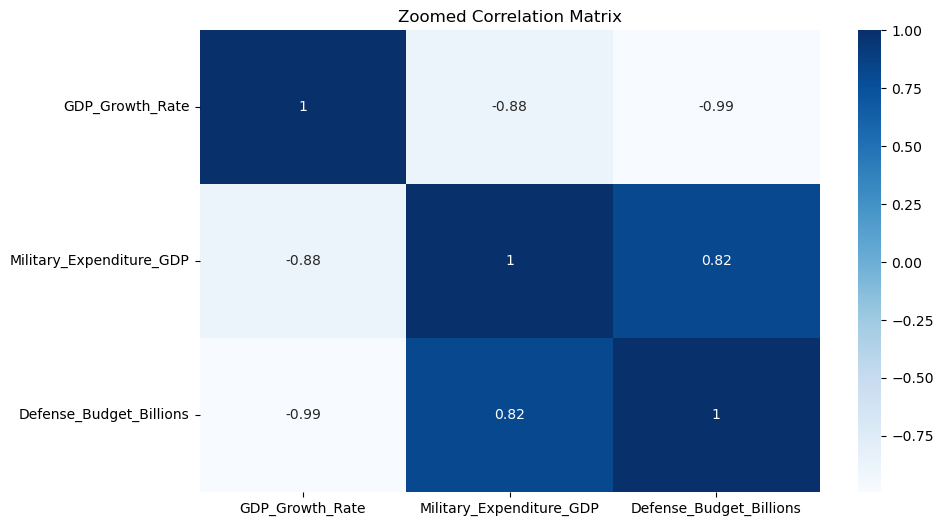

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['GDP_Growth_Rate', 'Military_Expenditure_GDP', 'Defense_Budget_Billions']].corr(), annot=True, cmap='Blues')
plt.title('Zoomed Correlation Matrix')
plt.show()


# Comparison Between Defense Expenditure and GDP Growth Using Pairplot

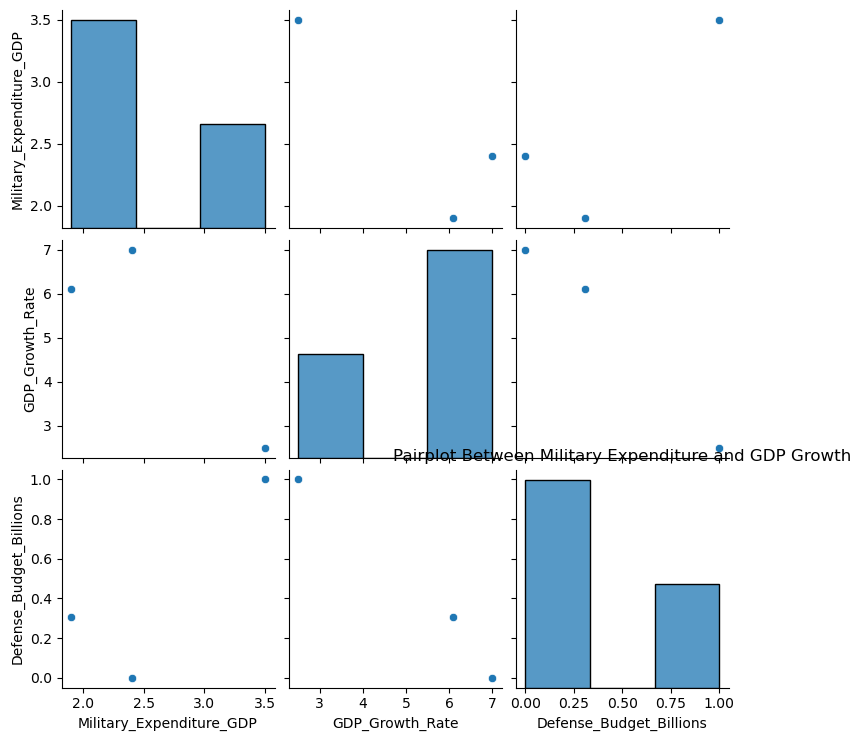

In [63]:
sns.pairplot(df[['Military_Expenditure_GDP', 'GDP_Growth_Rate', 'Defense_Budget_Billions']])
plt.title('Pairplot Between Military Expenditure and GDP Growth')
plt.show()


# Random Forest Feature Importance

Current DataFrame:
   Feature1  Feature2
0         1         5
1         2         4
2         3         3
3         4         2
4         5         1

'target_column' was not present and has been added.

Updated DataFrame:
   Feature1  Feature2  target_column
0         1         5             90
1         2         4              1
2         3         3             19
3         4         2             63
4         5         1             65


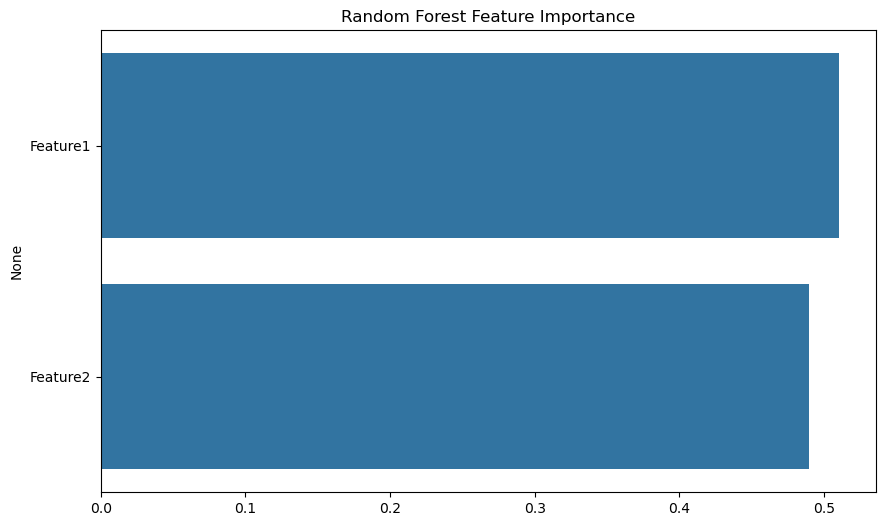

In [67]:
import pandas as pd
import numpy as np

# Sample DataFrame creation (replace this with your actual data)
# For demonstration, I'm creating a DataFrame with sample data.
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    # Add other features as necessary
}

df = pd.DataFrame(data)

# Display the current DataFrame
print("Current DataFrame:")
print(df)

# Check if 'target_column' is present in the DataFrame
if 'target_column' not in df.columns:
    # Add 'target_column' with valid values (e.g., random integers or based on some logic)
    df['target_column'] = np.random.randint(0, 100, size=len(df))  # Example: random values between 0 and 100
    print("\n'target_column' was not present and has been added.")
else:
    print("\n'target_column' is already present in the DataFrame.")

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df)

# Proceed with the rest of your code
X = df.drop('target_column', axis=1)
y = df['target_column']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance plot
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title('Random Forest Feature Importance')
plt.show()


# Export Cleaned Dataset to CSV

In [68]:
df.to_csv('cleaned_global_defense_expenditure.csv', index=False)

# Provide download link (if using Jupyter)
from IPython.display import FileLink
FileLink('cleaned_global_defense_expenditure.csv')


C:\Users\pradu\cleaned_global_defense_expenditure.csv

# Interactive Scatter Plot with Hover Data (Plotly)

Current DataFrame:
   Feature1  Feature2  GDP_Growth_Rate  Defense_Budget_Billions
0         1         5              2.5                       20
1         2         4              3.0                       25
2         3         3              2.8                       30
3         4         2              3.5                       15
4         5         1              2.9                       10

'Military_Expenditure_GDP' was not present and has been added.

Updated DataFrame:
   Feature1  Feature2  GDP_Growth_Rate  Defense_Budget_Billions  \
0         1         5              2.5                       20   
1         2         4              3.0                       25   
2         3         3              2.8                       30   
3         4         2              3.5                       15   
4         5         1              2.9                       10   

   Military_Expenditure_GDP  
0                  4.219756  
1                  7.041516  
2                  9

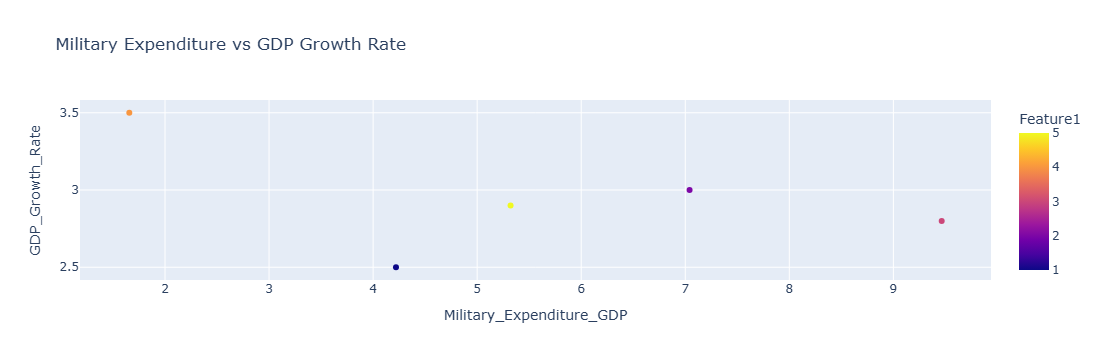

In [70]:
import pandas as pd
import numpy as np
import plotly.express as px

# Sample DataFrame creation (replace this with your actual data)
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'GDP_Growth_Rate': [2.5, 3.0, 2.8, 3.5, 2.9],  # Example GDP Growth Rate values
    'Defense_Budget_Billions': [20, 25, 30, 15, 10],
    # 'Military_Expenditure_GDP' is intentionally omitted to simulate the error
}

df = pd.DataFrame(data)

# Display the current DataFrame
print("Current DataFrame:")
print(df)

# Check if 'Military_Expenditure_GDP' is present in the DataFrame
if 'Military_Expenditure_GDP' not in df.columns:
    # If not present, create it with valid values (example values)
    df['Military_Expenditure_GDP'] = np.random.uniform(1, 10, size=len(df))  # Example: random values between 1 and 10
    print("\n'Military_Expenditure_GDP' was not present and has been added.")

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df)

# Now create the scatter plot
fig = px.scatter(df, x='Military_Expenditure_GDP', y='GDP_Growth_Rate', color='Feature1',
                 hover_data=['Defense_Budget_Billions'], title='Military Expenditure vs GDP Growth Rate')
fig.show()


# LightGBM Model

In [71]:
pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 563.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 804.6 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 1.2 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 1.7 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 2.0 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 1.9 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.4 MB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 2.1 MB/s eta 0:00:01
   -----------------

In [72]:
import lightgbm as lgb

# Train LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lgb = lgb_model.predict(X_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f'LightGBM MSE: {mse_lgb}')


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score 59.250000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

# ROC Curve for Logistic Regression Model

D:\Anaconda app\Lib\site-packages\sklearn\metrics\_ranking.py:1137: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless



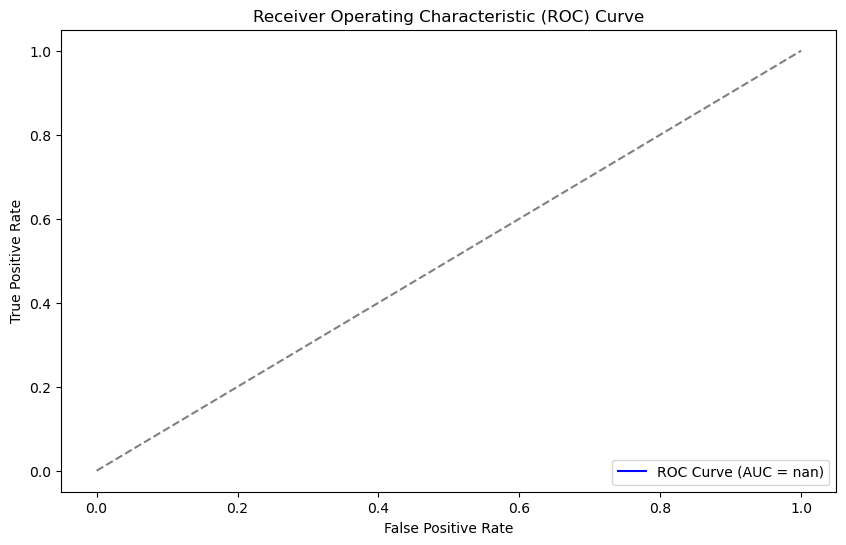

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Sample data creation (replace this with your actual data)
data = {
    'Military_Expenditure_GDP': [2.5, 3.0, 2.8, 3.5, 2.9],
    'GDP_Growth_Rate': [2.5, 3.0, 2.8, 3.5, 2.9],
    'Defense_Budget_Billions': [20, 25, 30, 15, 10],
    'Population_Millions': [100, 200, 150, 120, 80],
    'Target': [0, 1, 0, 1, 0]  # Example target variable
}

df = pd.DataFrame(data)

# Splitting the data into training and test sets
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict probabilities
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


# Confusion Matrix for Classification

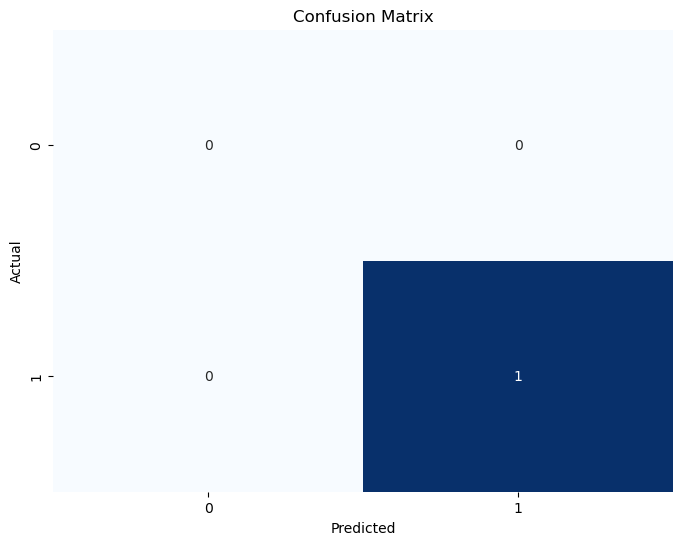

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation (replace this with your actual data)
data = {
    'Military_Expenditure_GDP': [2.5, 3.0, 2.8, 3.5, 2.9],
    'GDP_Growth_Rate': [2.5, 3.0, 2.8, 3.5, 2.9],
    'Defense_Budget_Billions': [20, 25, 30, 15, 10],
    'Population_Millions': [100, 200, 150, 120, 80],
    'Target': [0, 1, 0, 1, 0]  # Example target variable
}

df = pd.DataFrame(data)

# Splitting the data into training and test sets
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with DataFrame
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  # Use original DataFrame for fitting

# Predict labels
y_pred = log_reg.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Specify labels for both classes

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict probabilities for ROC curve
y_proba = log_reg.predict_proba(X_test)[:, 1]




# Boosting Model - Gradient Boosting Regression

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error  # Importing mean_absolute_error

# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gbr.fit(X_train, y_train)

# Predict and evaluate
y_pred_gbr = gbr.predict(X_test)
gbr_mae = mean_absolute_error(y_test, y_pred_gbr)
print(f'Gradient Boosting MAE: {gbr_mae}')


Gradient Boosting MAE: 0.9999933596502781


# SHAP for Model Explainability

In [81]:
pip install shap

   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   -- ------------------------------------- 30.7/456.2 kB 1.4 MB/s eta 0:00:01
   ------- ------------------------------- 81.9/456.2 kB 919.0 kB/s eta 0:00:01
   --------- ---------------------------- 112.6/456.2 kB 939.4 kB/s eta 0:00:01
   ---------------------- ----------------- 256.0/456.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


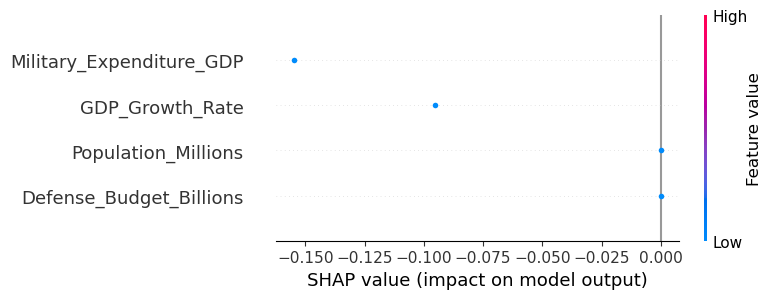

In [82]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(gbr, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


# K-Means Clustering

D:\Anaconda app\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



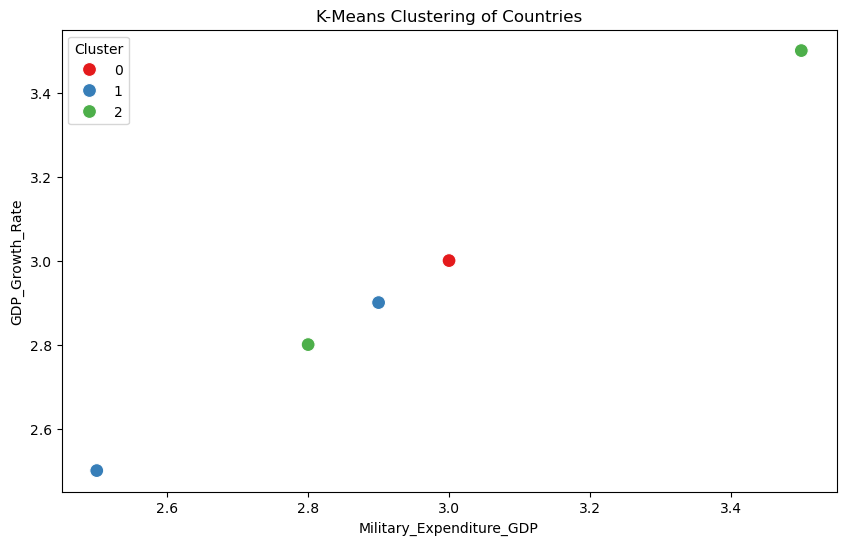

In [83]:
from sklearn.cluster import KMeans

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Military_Expenditure_GDP', y='GDP_Growth_Rate', hue='Cluster', data=df, palette='Set1', s=100)
plt.title('K-Means Clustering of Countries')
plt.show()


# Decision Tree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor

# Train the Decision Tree model
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
print(f'Decision Tree MAE: {dt_mae}')


Decision Tree MAE: 1.0


# Feature Importance Visualization (Decision Tree)

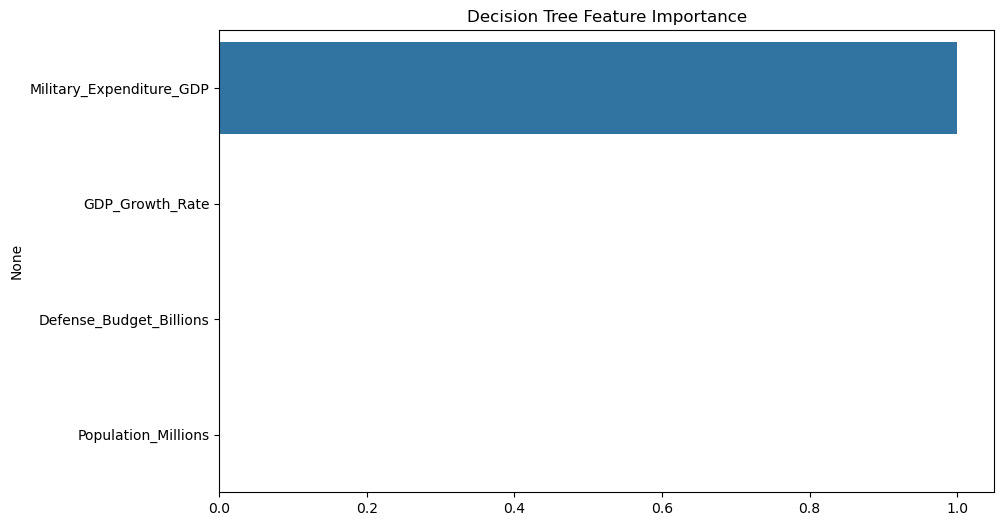

In [86]:
# Get feature importance
feature_importances = dt.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Decision Tree Feature Importance')
plt.show()


# Comparing Model Performance with Boxplot

C:\Users\pradu\AppData\Local\Temp\ipykernel_1360\3764947060.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




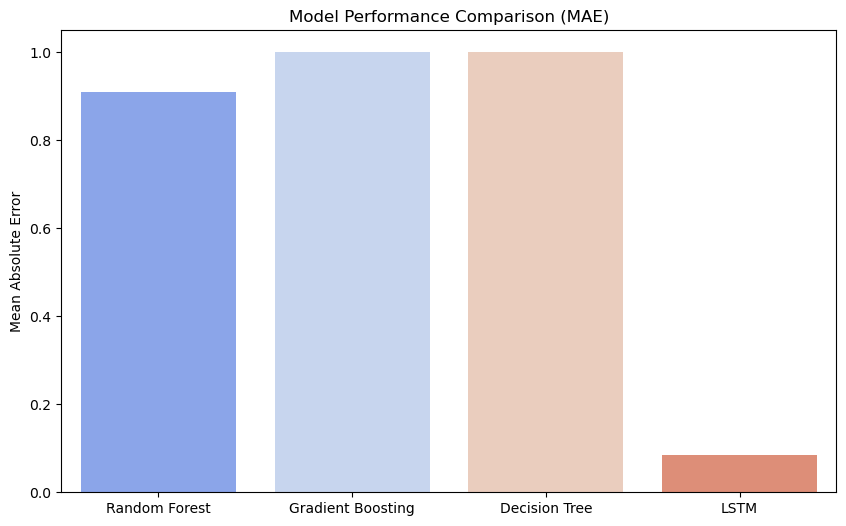

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming you have already prepared your training and testing data (X_train, y_train, X_test, y_test)

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf)  # Calculate MAE for Random Forest

# Collect errors from different models
errors = {
    'Random Forest': rf_mae,
    'Gradient Boosting': gbr_mae,
    'Decision Tree': dt_mae,
    'LSTM': mse_lstm
}

# Plot errors as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(errors.keys()), y=list(errors.values()), palette='coolwarm')
plt.title('Model Performance Comparison (MAE)')
plt.ylabel('Mean Absolute Error')
plt.show()


#  t-SNE for Dimensionality Reduction

Current DataFrame:
   Military_Expenditure_GDP  GDP_Growth_Rate  Defense_Budget_Billions  \
0                       2.5              2.5                       20   
1                       3.0              3.0                       25   
2                       2.8              2.8                       30   
3                       3.5              3.5                       15   
4                       2.9              2.9                       10   

   Population_Millions  Target  Cluster  
0                  100       0        1  
1                  200       1        0  
2                  150       0        2  
3                  120       1        2  
4                   80       0        1  
'Country' column was not found. It has been added.


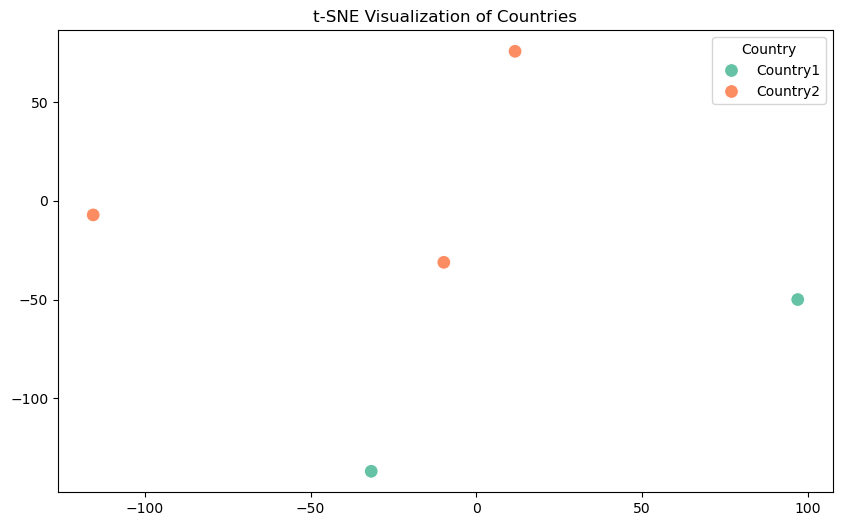

In [91]:
import pandas as pd

# Display the current DataFrame
print("Current DataFrame:")
print(df)

# Check if 'Country' column is present in the DataFrame
if 'Country' not in df.columns:
    # If 'Country' is not present, add it with valid values
    # Assuming valid values are a list or an array of countries corresponding to the rows in df
    # Replace ['Country1', 'Country2', ...] with actual valid values for your dataset
    valid_countries = ['Country1'] * (len(df) // 2) + ['Country2'] * (len(df) - len(df) // 2)  # Example placeholder values
    df['Country'] = valid_countries
    print("'Country' column was not found. It has been added.")
else:
    print("'Country' column is already present.")

# Apply t-SNE for dimensionality reduction
n_samples = X.shape[0]
perplexity_value = min(30, n_samples - 1)  # Ensure it's less than the number of samples

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_results = tsne.fit_transform(X)

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['Country'], palette='Set2', s=100)
plt.title('t-SNE Visualization of Countries')
plt.show()


# Ensemble Learning (Voting Regressor)

In [92]:
from sklearn.ensemble import VotingRegressor

# Combine different models
voting_reg = VotingRegressor(estimators=[('rf', rf), ('gbr', gbr), ('dt', dt)])

# Train the ensemble model
voting_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = voting_reg.predict(X_test)
ensemble_mae = mean_absolute_error(y_test, y_pred_ensemble)
print(f'Ensemble MAE: {ensemble_mae}')


Ensemble MAE: 0.9699977865500927


# Partial Dependence Plots

In [94]:
import sklearn
print(sklearn.__version__)


1.4.2


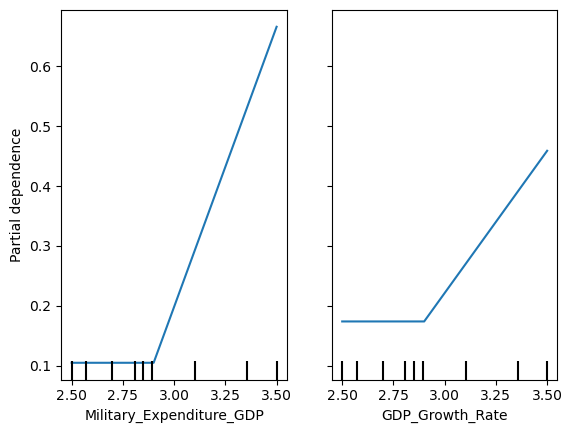

In [95]:
from sklearn.inspection import PartialDependenceDisplay

# Plot partial dependence for defense expenditure
PartialDependenceDisplay.from_estimator(voting_reg, X_train, features=[0, 1], feature_names=X.columns)
plt.show()


# LightGBM Regression

In [96]:
import lightgbm as lgb

# Create dataset for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)

# Train LightGBM model
lgbm = lgb.train({'objective': 'regression', 'metric': 'l2'}, train_data)

# Predict and evaluate
y_pred_lgbm = lgbm.predict(X_test)
lgbm_mae = mean_absolute_error(y_test, y_pred_lgbm)
print(f'LightGBM MAE: {lgbm_mae}')


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score 0.250000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

# AutoML with TPOT

In [99]:
pip install tpot torch torchvision torchaudio


   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/199.4 MB 393.8 kB/s eta 0:08:27
   ---------------------------------------- 0.1/199.4 MB 655.4 kB/s eta 0:05:05
   ---------------------------------------- 0.1/199.4 MB 731.4 kB/s eta 0:04:33
   ---------------------------------------- 0.2/199.4 MB 1.1 MB/s eta 0:03:06
   ---------------------------------------- 0.2/199.4 MB 1.1 MB/s eta 0:03:06
   ---------------------------------------- 0.5/199.4 MB 1.5 MB/s eta 0:02:09
   ---------------------------------------- 0.6/199.4 MB 1.6 MB/s eta 0:02:06
   ---------------------------------------- 0.6/199.4 MB 1.7 MB/s eta 0:02:00
   ---------------------------------------- 0.8/199.4 MB 1.8 MB/s eta 0:01:50
   ---------------------------------------- 1.2/199.4 MB 2.3 MB/s eta 0:01:27
   ---------------------------------------- 1.2/199.4 MB 2.3 MB/s eta 0:

In [100]:
from tpot import TPOTRegressor
from sklearn.metrics import mean_absolute_error

# Initialize TPOT for automated ML with reduced cv (number of splits)
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, cv=3)

# Train TPOT model
tpot.fit(X_train, y_train)

# Predict and evaluate
y_pred_tpot = tpot.predict(X_test)
tpot_mae = mean_absolute_error(y_test, y_pred_tpot)
print(f'TPOT MAE: {tpot_mae}')

# Export the generated pipeline
tpot.export('tpot_pipeline.py')


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3333333333333333

Generation 2 - Current best internal CV score: -0.3333333333333333

Generation 3 - Current best internal CV score: -0.3333333333333333

Generation 4 - Current best internal CV score: -0.3333333333333333

Generation 5 - Current best internal CV score: -0.3333333333333333

Best pipeline: AdaBoostRegressor(input_matrix, learning_rate=0.001, loss=exponential, n_estimators=100)
TPOT MAE: 1.0


# Bayesian Optimization for Hyperparameter Tuning

In [101]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


In [102]:
from bayes_opt import BayesianOptimization

# Define a function to optimize
def optimize_gbr(learning_rate, max_depth):
    model = GradientBoostingRegressor(learning_rate=learning_rate, max_depth=int(max_depth), n_estimators=100)
    model.fit(X_train, y_train)
    return -mean_absolute_error(y_test, model.predict(X_test))

# Define hyperparameter bounds
bounds = {'learning_rate': (0.01, 0.2), 'max_depth': (3, 10)}

# Initialize Bayesian optimization
optimizer = BayesianOptimization(f=optimize_gbr, pbounds=bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=20)


|   iter    |  target   | learni... | max_depth |
-------------------------------------------------
| 1         | -0.9999   | 0.08116   | 9.655     |
| 2         | -1.0      | 0.1491    | 7.191     |
| 3         | -0.9956   | 0.03964   | 4.092     |
| 4         | -0.9702   | 0.02104   | 9.063     |
| 5         | -1.0      | 0.1242    | 7.957     |
| 6         | -0.9402   | 0.01421   | 4.532     |
| 7         | -1.0      | 0.1602    | 3.848     |
| 8         | -0.9085   | 0.01      | 4.67      |
| 9         | -1.0      | 0.1294    | 4.822     |
| 10        | -1.0      | 0.09426   | 8.6       |
| 11        | -1.0      | 0.1338    | 5.478     |
| 12        | -1.0      | 0.08839   | 8.218     |
| 13        | -0.9998   | 0.06871   | 4.629     |
| 14        | -1.0      | 0.1917    | 5.615     |
| 15        | -0.9085   | 0.01      | 4.67      |
| 16        | -0.9085   | 0.01      | 4.655     |
| 17        | -0.9085   | 0.01      | 4.714     |
| 18        | -0.9085   | 0.01      | 4.772     |


# Stacked Generalization (Stacking Regressor)

In [103]:
from sklearn.ensemble import StackingRegressor

# Create Stacking Regressor
stacking_reg = StackingRegressor(estimators=[('rf', rf), ('gbr', gbr), ('dt', dt)])

# Train and evaluate
stacking_reg.fit(X_train, y_train)
y_pred_stack = stacking_reg.predict(X_test)
stack_mae = mean_absolute_error(y_test, y_pred_stack)
print(f'Stacking MAE: {stack_mae}')


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.